# Восстановление золота из руды

<h2> (Тема №9: Сборный проект - 2) <a class="tocSkip"> </h2>

<a name="1"></a>
## Содержание

1  [Содержание](#1)

2  [Описание проекта](#2)

*    2.1  [Цель проекта](#21)
*    2.2  [Задачи проекта](#22)
*    2.3  [Технологический процесс](#23)
*    2.4  [Описание данных](#24)
*    2.5  [Расчёты](#25)

    *    2.5.1  [Эффективность обогащения](#251)
    *    2.5.2  [Метрика качества *sMAPE*](#252)
    *    2.5.3  [Итоговая метрика *final_sMAPE*](#253)
    
*    2.6  [План работы](#26)

3  [Подготовка данных](#3)

*    3.1  [Исследование данных](#31)

    *    3.1.1  [Обучающая выборка](#311)
    *    3.1.2  [Тестовая выборка](#312)
    *    3.1.3  [Исходные данные](#313)
    *    3.1.4  [Дополнение](#314)
    *    3.1.5  [Вывод по п. 3.1](#315)    
    
*    3.2  [Расчёт эффективности обогащения](#32)
*    3.3  [Анализ признаков, недоступных в тестовой выборке](#33)
*    3.4  [Предобработка данных](#34)
*    3.5  [Вывод](#35)

4  [Анализ данных](#4)

*    4.1  [Распределение концентрации металлов](#41)
*    4.2  [Распределение размеров гранул сырья](#42)

    *    4.2.1  [Гранулы исходного сырья](#421)
    *    4.2.2  [Гранулы при первичной очистке](#422)
    *    4.2.3  [Вывод по п. 4.2](#423)
    
*    4.3  [Суммарная концентрация всех веществ на разных стадиях](#43)
*    4.4  [Вывод](#44)

5  [Обучение моделей](#5)

*    5.1  [Функция для вычисления *final_sMAPE*](#51)
*    5.2  [Разделение обучающей выборки на признаки и таргет](#52)
*    5.3  [`DecisionTreeRegressor` + `GridSearchCV`](#53)
    
    *    5.3.1  [Черновой концентрат](#531)
    *    5.3.2  [Финальный концентрат](#532)
    
*    5.4  [`RandomForestRegressor` + `GridSearchCV`](#54)
    
    *    5.4.1  [Черновой концентрат](#541)
    *    5.4.2  [Финальный концентрат](#542)
        
*    5.5  [`LinearRegression` + `cross_val_score`](#55)
    
    *    5.5.1  [Черновой концентрат](#551)
    *    5.5.2  [Финальный концентрат](#552)
        
*    5.6  [Сравнение моделей](#56)        
*    5.7  [Вывод](#57)
    
6  [Тестирование лучшей модели](#6)

*    6.1  [Качество модели](#61)

    *    6.1.1  [Черновой концентрат](#611)
    *    6.1.2  [Финальный концентрат](#612)
    
*    6.2  [Итоговая метрика *final_sMAPE*](#62)
*    6.3  [`DummyRegressor`](#63)

    *    6.3.1  [Черновой концентрат](#631)
    *    6.3.2  [Финальный концентрат](#632)
    
*    6.4  [Итоговое сравнение моделей](#64)
*    6.5  [Вывод](#65)

7  [Общий вывод](#7)

<a name="2"></a> <div style="text-align: right">[Cодержание](#Содержание)</div>
## Описание проекта

Подготовим прототип модели машинного обучения для компании ["Цифра"](https://www.zyfra.com/ru/). Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используем данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Нам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, будем обращаться к библиотекам `pandas`, `matplotlib` и `sklearn`. Нам поможет их документация.

<a name="21"></a> <div style="text-align: right">[Cодержание](#Содержание)</div>
### Цель проекта

Провести исследование с целью построения модели машинного обучения, которая поможет прогнозировать коэффициент восстановления золота из золотосодержащей руды.

Результаты исследования помогут оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

<a name="22"></a> <div style="text-align: right">[Cодержание](#Содержание)</div>
### Задачи проекта

1. Изучить данные.
2. Подготовить данные.
3. Выполнить анализ данных.
4. Обучить модели.
5. Протестировать лучшую модель.
6. Написать общий вывод.
   
Нам пригодятся формулы метрик качества.

<a name="23"></a> <div style="text-align: right">[Cодержание](#Содержание)</div>
### Технологический процесс

Как золото получают из руды? Изучим внимательно стадии процесса.

Когда добытая руда проходит первичную обработку, получается дроблёная смесь. Её отправляют на флотацию (обогащение) и двухэтапную очистку.

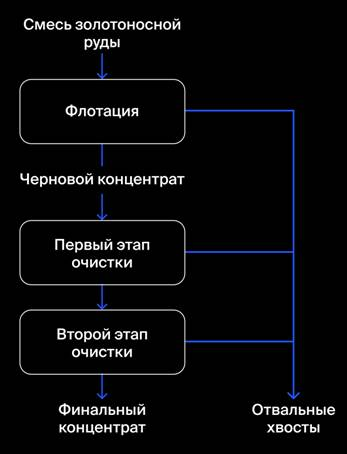

Опишем каждую стадию:

**1. Флотация**

Во флотационную установку подаётся смесь золотосодержащей руды. После обогащения получается черновой концентрат и "отвальные хвосты", то есть остатки продукта с низкой концентрацией ценных металлов.

На стабильность этого процесса влияет непостоянное и неоптимальное физико-химическое состояние флотационной пульпы (смеси твёрдых частиц и жидкости).

**2. Очистка**

Черновой концентрат проходит две очистки. На выходе получается финальный концентрат и новые отвальные хвосты.

<a name="24"></a> <div style="text-align: right">[Cодержание](#Содержание)</div>
### Описание данных

В нашем распоряжении сырые данные с параметрами добычи и очистки, предоставленные компанией ["Цифра"](https://www.zyfra.com/ru/).

Данные находятся в трёх файлах:
- `gold_recovery_train_new.csv` - обучающая выборка;
- `gold_recovery_test_new.csv` - тестовая выборка;
- `gold_recovery_full_new.csv` - исходные данные.

Данные индексируются датой и временем получения информации (признак `date`). Соседние по времени параметры часто похожи.

Некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей. **Также в тестовом наборе нет целевых признаков.**

Исходный датасет содержит обучающую и тестовую выборки со всеми признаками.

В нашем распоряжении сырые данные: их просто выгрузили из хранилища. Прежде чем приступить к построению модели, проверим их на корректность.

**Целевые признаки:**

- `rougher.output.recovery` - эффективность обогащения чернового концентрата;
- `final.output.recovery` - эффективность обогащения финального концентрата.

**Технологический процесс**

- `Rougher feed` — исходное сырье
- `Rougher additions` (или *reagent additions*) — флотационные реагенты: *Xanthate*, *Sulphate*, *Depressant*
   - *Xanthate* **— ксантогенат (промотер, или активатор флотации);
   - *Sulphate* — сульфат (на данном производстве сульфид натрия);
   - *Depressant* — депрессант (силикат натрия).
- `Rougher process` (англ. "грубый процесс") — флотация
- `Rougher tails` — отвальные хвосты
- `Float banks` — флотационная установка
- `Cleaner process` — очистка
- `Rougher Au` — черновой концентрат золота
- `Final Au` — финальный концентрат золота

**Параметры этапов**

- `air amount` — объём воздуха
- `fluid levels` — уровень жидкости
- `feed size` — размер гранул сырья
- `feed rate` — скорость подачи


**Наименование признаков** имеет такой вид:

`[этап].[тип_параметра].[название_параметра]`

Пример: `rougher.input.feed_ag`

Возможные значения для блока `[этап]`:
- `rougher` — флотация
- `primary_cleaner` — первичная очистка
- `secondary_cleaner` — вторичная очистка
- `final` — финальные характеристики

Возможные значения для блока `[тип_параметра]`:
- `input` — параметры сырья
- `output` — параметры продукта
- `state` — параметры, характеризующие текущее состояние этапа
- `calculation` — расчётные характеристики

<a name="25"></a> <div style="text-align: right">[Cодержание](#Содержание)</div>
### Расчёты

<a name="251"></a> <div style="text-align: right">[Cодержание](#Содержание)</div>
#### Эффективность обогащения

Нам нужно смоделировать процесс восстановления золота из золотосодержащей руды.

Эффективность обогащения рассчитывается по формуле


$$
Recovery = {{C \times (F - T)} \over {F \times (C - T)}} \times 100\%
$$

где:
- $C$ — доля золота в концентрате после флотации/очистки;
- $F$ — доля золота в сырье/концентрате до флотации/очистки;
- $T$ — доля золота в отвальных хвостах после флотации/очистки.

<a name="252"></a> <div style="text-align: right">[Cодержание](#Содержание)</div>
#### Метрика качества *sMAPE*

Для решения задачи введём новую метрику качества — ***sMAPE*** (англ. *Symmetric Mean Absolute Percentage Error*, "симметричное среднее абсолютное процентное отклонение").

Она похожа на *MAE*, но выражается не в абсолютных величинах, а в относительных. Почему *симметричная*? Она одинаково учитывает масштаб и целевого признака, и предсказания.

Метрика *sMAPE* вычисляется так:

$$
sMAPE = {1 \over N} \sum\limits_{i=1}^N {{|y_i - \widehat{y}_i|} \over {(|y_i| + |\widehat{y}_i|) / 2}} \times 100\%
$$


Обозначения:

${y}_i$ - значение целевого признака для объекта с порядковым номером ***i*** в выборке, на которой измеряется качество;

$\widehat{y}_i$ - значение предсказания для объекта с порядковым номером ***i***, например, в тестовой выборке;

$N$ - количество объектов в выборке;

$\sum\limits_{i=1}^N$ - суммирование по всем объектам выборки (***i*** меняется от 1 до *N*).

<a name="253"></a> <div style="text-align: right">[Cодержание](#Содержание)</div>
#### Итоговая метрика *final_sMAPE*

Для прогноза коэффициента восстановления золота из золотосодержащей руды нужно найти долю золота в концентратах и хвостах. Причём важен не только финальный продукт, но и черновой концентрат.

Т.е. нужно спрогнозировать сразу две величины:

1. эффективность обогащения чернового концентрата `rougher.output.recovery`;
2. эффективность обогащения финального концентрата `final.output.recovery`.

Итоговая метрика *final_sMAPE* складывается из двух величин:

$$
final\_sMAPE = 25\% \times sMAPE(rougher) + 75\% \times sMAPE(final)
$$

<a name="26"></a> <div style="text-align: right">[Cодержание](#Содержание)</div>
### План работы

1. Подготовим данные:
   
   1.1. Откроем файлы и изучим их.
   
   1.2. Проверим, что эффективность обогащения рассчитана правильно. Вычислим её на обучающей выборке для признака `rougher.output.recovery`. Найдём *MAE* между нашими расчётами и значением признака. Опишем выводы.
   
   1.3. Проанализируем признаки, недоступные в тестовой выборке. Что это за параметры? К какому типу относятся?
   
   1.4. Проведём предобработку данных.


2. Проанализируем данные:
   
   2.1. Посмотрим, как меняется концентрация металлов (*Au*, *Ag*, *Pb*) на различных этапах очистки. Опишем выводы.
   
   2.2. Сравним распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.
   
   2.3. Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.


3. Построим модель:
   
   3.1. Напишем функцию для вычисления итоговой метрики *final_sMAPE*.
   
   3.2. Обучим разные модели и оценим их качество кросс-валидацией. 
   
   3.3. Выберем лучшую модель и проверим её на тестовой выборке. Опишем выводы.

<a name="3"></a> <div style="text-align: right">[Cодержание](#Содержание)</div>
## Подготовка данных

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import time
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.model_selection import cross_val_score, GridSearchCV, \
train_test_split
from sklearn.tree import DecisionTreeRegressor 
from tqdm import tqdm

RANDOM_STATE = 12345

<a name="31"></a> <div style="text-align: right">[Cодержание](#Содержание)</div>
### Исследование данных

Откроем файлы и изучим их.

<a name="311"></a> <div style="text-align: right">[Cодержание](#Содержание)</div>
#### Обучающая выборка

Выведем размеры и первые 5 строк данных обучающей выборки `gold_recovery_train_new`. Данные индексируются датой и временем получения информации - признак `date`, поэтому используем признак `date` в качестве индекса.

In [2]:
try:
    gold_train = pd.read_csv('/datasets/gold_recovery_train_new.csv', index_col='date', parse_dates=['date'])
except:
    try:
        gold_train = pd.read_csv(r'C:/Users/lorad/OneDrive/Documents/Моя папка/Data Science/Курсы/'
                                  'Яндекс.Практикум. Специалист по Data Science/Проектная работа/'
                  '09. Сборный Проект - 2/gold_recovery_train_new.csv', index_col='date', parse_dates=['date'])
    except:
        try:
            gold_train = pd.read_csv(r'D:/Юлия/Data Science/Курсы/'
                                      'Яндекс.Практикум. Специалист по Data Science/Проектная работа/'
                 '09. Сборный Проект - 2/gold_recovery_train_new.csv', index_col='date', parse_dates=['date'])
        except:
            gold_train = pd.read_csv('https://docs.google.com/spreadsheets/d/e/'
                '2PACX-1vSOX_J8atIAaIHhhx0SFaWMMlWL3HMJWv524weuDiyfz20_iH7xHNbiAuiBBRiQAZwsHu8k7olUkG74/'
                'pub?gid=736147676&single=true&output=csv', index_col='date', parse_dates=['date'])

In [3]:
gold_train.shape

(14149, 86)

Для того, чтобы вывести все признаки, используем метод `pandas.set_option()`.

In [4]:
pd.set_option('display.max_columns', None)
gold_train.head()

final.output.concentrate_ag  final.output.concentrate_pb  \
date                                                                            
2016-01-15 00:00:00                     6.055403                     9.889648   
2016-01-15 01:00:00                     6.029369                     9.968944   
2016-01-15 02:00:00                     6.055926                    10.213995   
2016-01-15 03:00:00                     6.047977                     9.977019   
2016-01-15 04:00:00                     6.148599                    10.142511   

                     final.output.concentrate_sol  \
date                                                
2016-01-15 00:00:00                      5.507324   
2016-01-15 01:00:00                      5.257781   
2016-01-15 02:00:00                      5.383759   
2016-01-15 03:00:00                      4.858634   
2016-01-15 04:00:00                      4.939416   

                     final.output.concentrate_au  final.output.recovery  \
date                                                                      
2016-01-15 00:00:00                    42.192020              70.541216   
2016-01-15 01:00:00                    42.701629              69.266198   
2016-01-15 02:00:00                    42.657501              68.116445   
2016-01-15 03:00:00                    42.689819              68.347543   
2016-01-15 04:00:00                    42.774141              66.927016   

                     final.output.tail_ag  final.output.tail_pb  \
date                                                              
2016-01-15 00:00:00             10.411962              0.895447   
2016-01-15 01:00:00             10.462676              0.927452   
2016-01-15 02:00:00             10.507046              0.953716   
2016-01-15 03:00:00             10.422762              0.883763   
2016-01-15 04:00:00             10.360302              0.792826   

                     final.output.tail_sol  final.output.tail_au  \
date                                                               
2016-01-15 00:00:00              16.904297              2.143149   
2016-01-15 01:00:00              16.634514              2.224930   
2016-01-15 02:00:00              16.208849              2.257889   
2016-01-15 03:00:00              16.532835              2.146849   
2016-01-15 04:00:00              16.525686              2.055292   

                     primary_cleaner.input.sulfate  \
date                                                 
2016-01-15 00:00:00                     127.092003   
2016-01-15 01:00:00                     125.629232   
2016-01-15 02:00:00                     123.819808   
2016-01-15 03:00:00                     122.270188   
2016-01-15 04:00:00                     117.988169   

                     primary_cleaner.input.depressant  \
date                                                    
2016-01-15 00:00:00                         10.128295   
2016-01-15 01:00:00                         10.296251   
2016-01-15 02:00:00                         11.316280   
2016-01-15 03:00:00                         11.322140   
2016-01-15 04:00:00                         11.913613   

                     primary_cleaner.input.feed_size  \
date                                                   
2016-01-15 00:00:00                             7.25   
2016-01-15 01:00:00                             7.25   
2016-01-15 02:00:00                             7.25   
2016-01-15 03:00:00                             7.25   
2016-01-15 04:00:00                             7.25   

                     primary_cleaner.input.xanthate  \
date                                                  
2016-01-15 00:00:00                        0.988759   
2016-01-15 01:00:00                        1.002663   
2016-01-15 02:00:00                        0.991265   
2016-01-15 03:00:00                        0.996739   
2016-01-15 04:00:00                        1.009869   

                     primary_cleaner.output.concen

Проверим явные дубликаты в обучающей выборке `gold_recovery_train_new`.

In [5]:
gold_train.duplicated().sum()

0

Выведем общую информацию об обучающей выборке `gold_recovery_train_new`.

In [6]:
gold_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14148 non-null  float64
 1   final.output.concentrate_pb                         14148 non-null  float64
 2   final.output.concentrate_sol                        13938 non-null  float64
 3   final.output.concentrate_au                         14149 non-null  float64
 4   final.output.recovery                               14149 non-null  float64
 5   final.output.tail_ag                                14149 non-null  float64
 6   final.output.tail_pb                                14049 non-null  float64
 7   final.output.tail_sol                               14144 non-null  float64
 8   final.output.tail_au                     

Выведем количество пропусков в обучающей выборке `gold_recovery_train_new`. Для того, чтобы вывести все строки, используем метод `pandas.set_option()`.

In [7]:
pd.set_option('display.max_rows', None)
gold_train.isna().sum()

final.output.concentrate_ag                              1
final.output.concentrate_pb                              1
final.output.concentrate_sol                           211
final.output.concentrate_au                              0
final.output.recovery                                    0
final.output.tail_ag                                     0
final.output.tail_pb                                   100
final.output.tail_sol                                    5
final.output.tail_au                                     0
primary_cleaner.input.sulfate                           20
primary_cleaner.input.depressant                        32
primary_cleaner.input.feed_size                          0
primary_cleaner.input.xanthate                         100
primary_cleaner.output.concentrate_ag                    0
primary_cleaner.output.concentrate_pb                   86
primary_cleaner.output.concentrate_sol                 286
primary_cleaner.output.concentrate_au                   

Выведем числовое описание данных в обучающей выборке, применив метод `.describe()`.

In [8]:
gold_train.describe()

final.output.concentrate_ag  final.output.concentrate_pb  \
count                 14148.000000                 14148.000000   
mean                      5.142034                    10.132960   
std                       1.369586                     1.654930   
min                       0.000000                     0.000000   
25%                       4.211620                     9.297355   
50%                       4.994652                    10.297144   
75%                       5.859540                    11.170603   
max                      16.001945                    17.031899   

       final.output.concentrate_sol  final.output.concentrate_au  \
count                  13938.000000                 14149.000000   
mean                       9.202849                    44.003792   
std                        2.790516                     4.905261   
min                        0.000000                     0.000000   
25%                        7.484645                    43.276111   
50%                        8.845462                    44.872436   
75%                       10.487508                    46.166425   
max                       18.124851                    52.756638   

       final.output.recovery  final.output.tail_ag  final.output.tail_pb  \
count           14149.000000          14149.000000          14049.000000   
mean               66.518832              9.607035              2.597298   
std                10.295402              2.319069              0.971843   
min                 0.000000              0.000000              0.000000   
25%                62.545817              7.997429              1.905973   
50%                67.432775              9.480270              2.592022   
75%                72.346428             11.003707              3.241723   
max               100.000000             19.552149              5.639565   

       final.output.tail_sol  final.output.tail_au  \
count           14144.000000          14149.000000   
mean               10.512122              2.918421   
std                 3.003617              0.903712   
min                 0.000000              0.000000   
25%                 8.811324              2.368607   
50%                10.514621              2.851025   
75%                11.933009              3.434764   
max                22.317730              8.197408   

       primary_cleaner.input.sulfate  primary_cleaner.input.depressant  \
count                   14129.000000                      14117.000000   
mean                      133.320659                          8.866996   
std                        39.431659                          3.361589   
min                         0.003112                          0.000000   
25%                       107.006651                          6.040604   
50%                       133.018328                          8.035811   
75%                       159.825396                         11.522173   
max                       250.127834                         20.052255   

       primary_cleaner.input.feed_size  primary_cleaner.input.xanthate  \
count                     14149.000000                    14049.000000   
mean                          7.322310                        0.885588   
std                           0.614062                        0.372714   
min                           1.080000                        0.000005   
25%                           6.960000                        0.607021   
50%                           7.290000                        0.888749   
75%                           7.700000                        1.100933   
max                          10.470000                        2.512968   

       primary_cleaner.output.concentrate_ag  \
count                           14149.000000   
mean                                8.200916   
std                                 2.005185   
min                                 0.000000   
25%                                 7.107126

<a name="гистограмма"></a>
Визуализируем при помощи гистограмм распределение переменных в обучающей выборке `gold_recovery_train_new`.

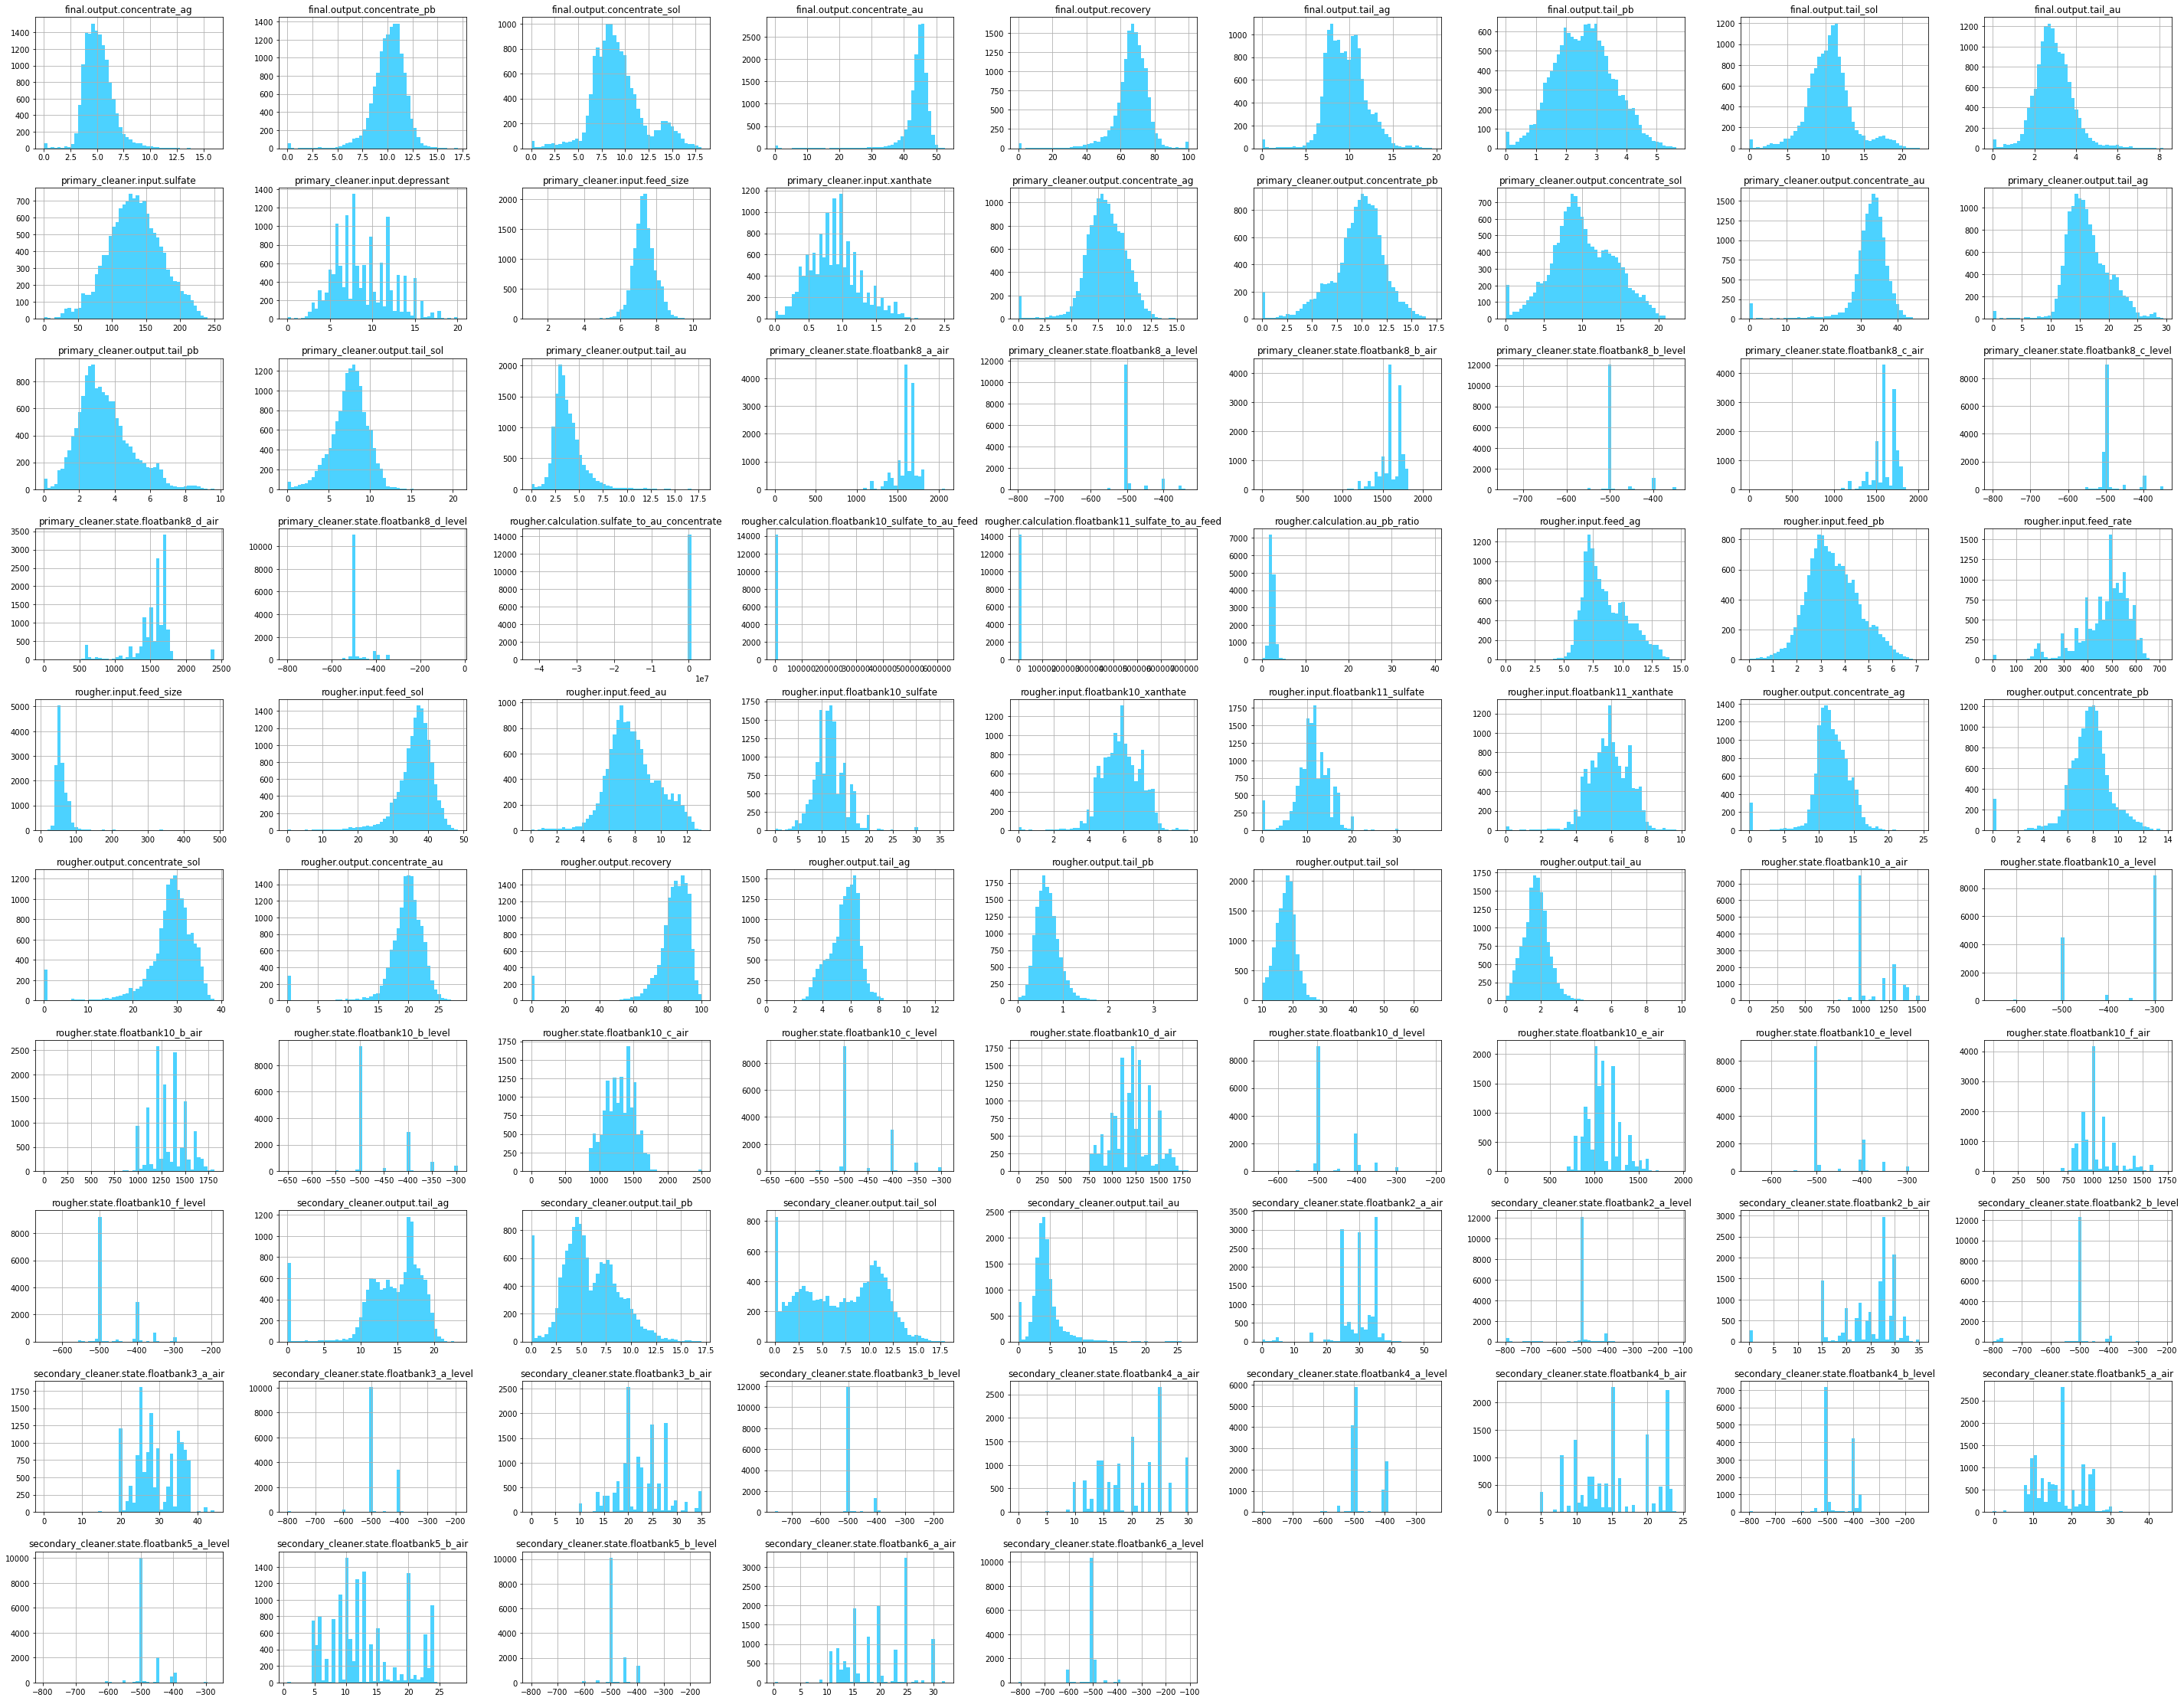

CPU times: total: 10.4 s
Wall time: 10.4 s


In [9]:
%%time

gold_train.hist(figsize=(50, 40), bins=50, 
                alpha=0.7, color='deepskyblue')
plt.show()

Отдельно визуализируем распределение целевых признаков `rougher.output.recovery` и `final.output.recovery` в обучающей выборке `gold_recovery_train_new`.

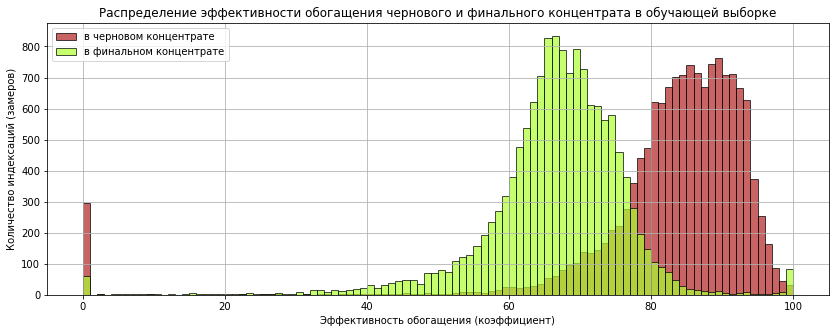

In [10]:
gold_train['rougher.output.recovery']\
.hist(figsize=(14, 5), bins=100, alpha=0.7, 
     color='firebrick', edgecolor = 'black')

gold_train['final.output.recovery']\
.hist(figsize=(14, 5), bins=100, alpha=0.7, 
     color='greenyellow', edgecolor = 'black')

plt.grid(True)
plt.legend(['в черновом концентрате', 
            'в финальном концентрате'])
plt.xlabel('Эффективность обогащения (коэффициент)')
plt.ylabel('Количество индексаций (замеров)')
plt.title('Распределение эффективности обогащения чернового и '
          'финального концентрата в обучающей выборке')
plt.show()

<a name="хитмэп"></a>
Проведём корреляционный анализ для обучающей выборки `gold_recovery_train_new` и посмотрим, как переменные взаимосвязаны между собой. Построим тепловую карту (хитмэп) коэффициентов корреляции Пирсона.

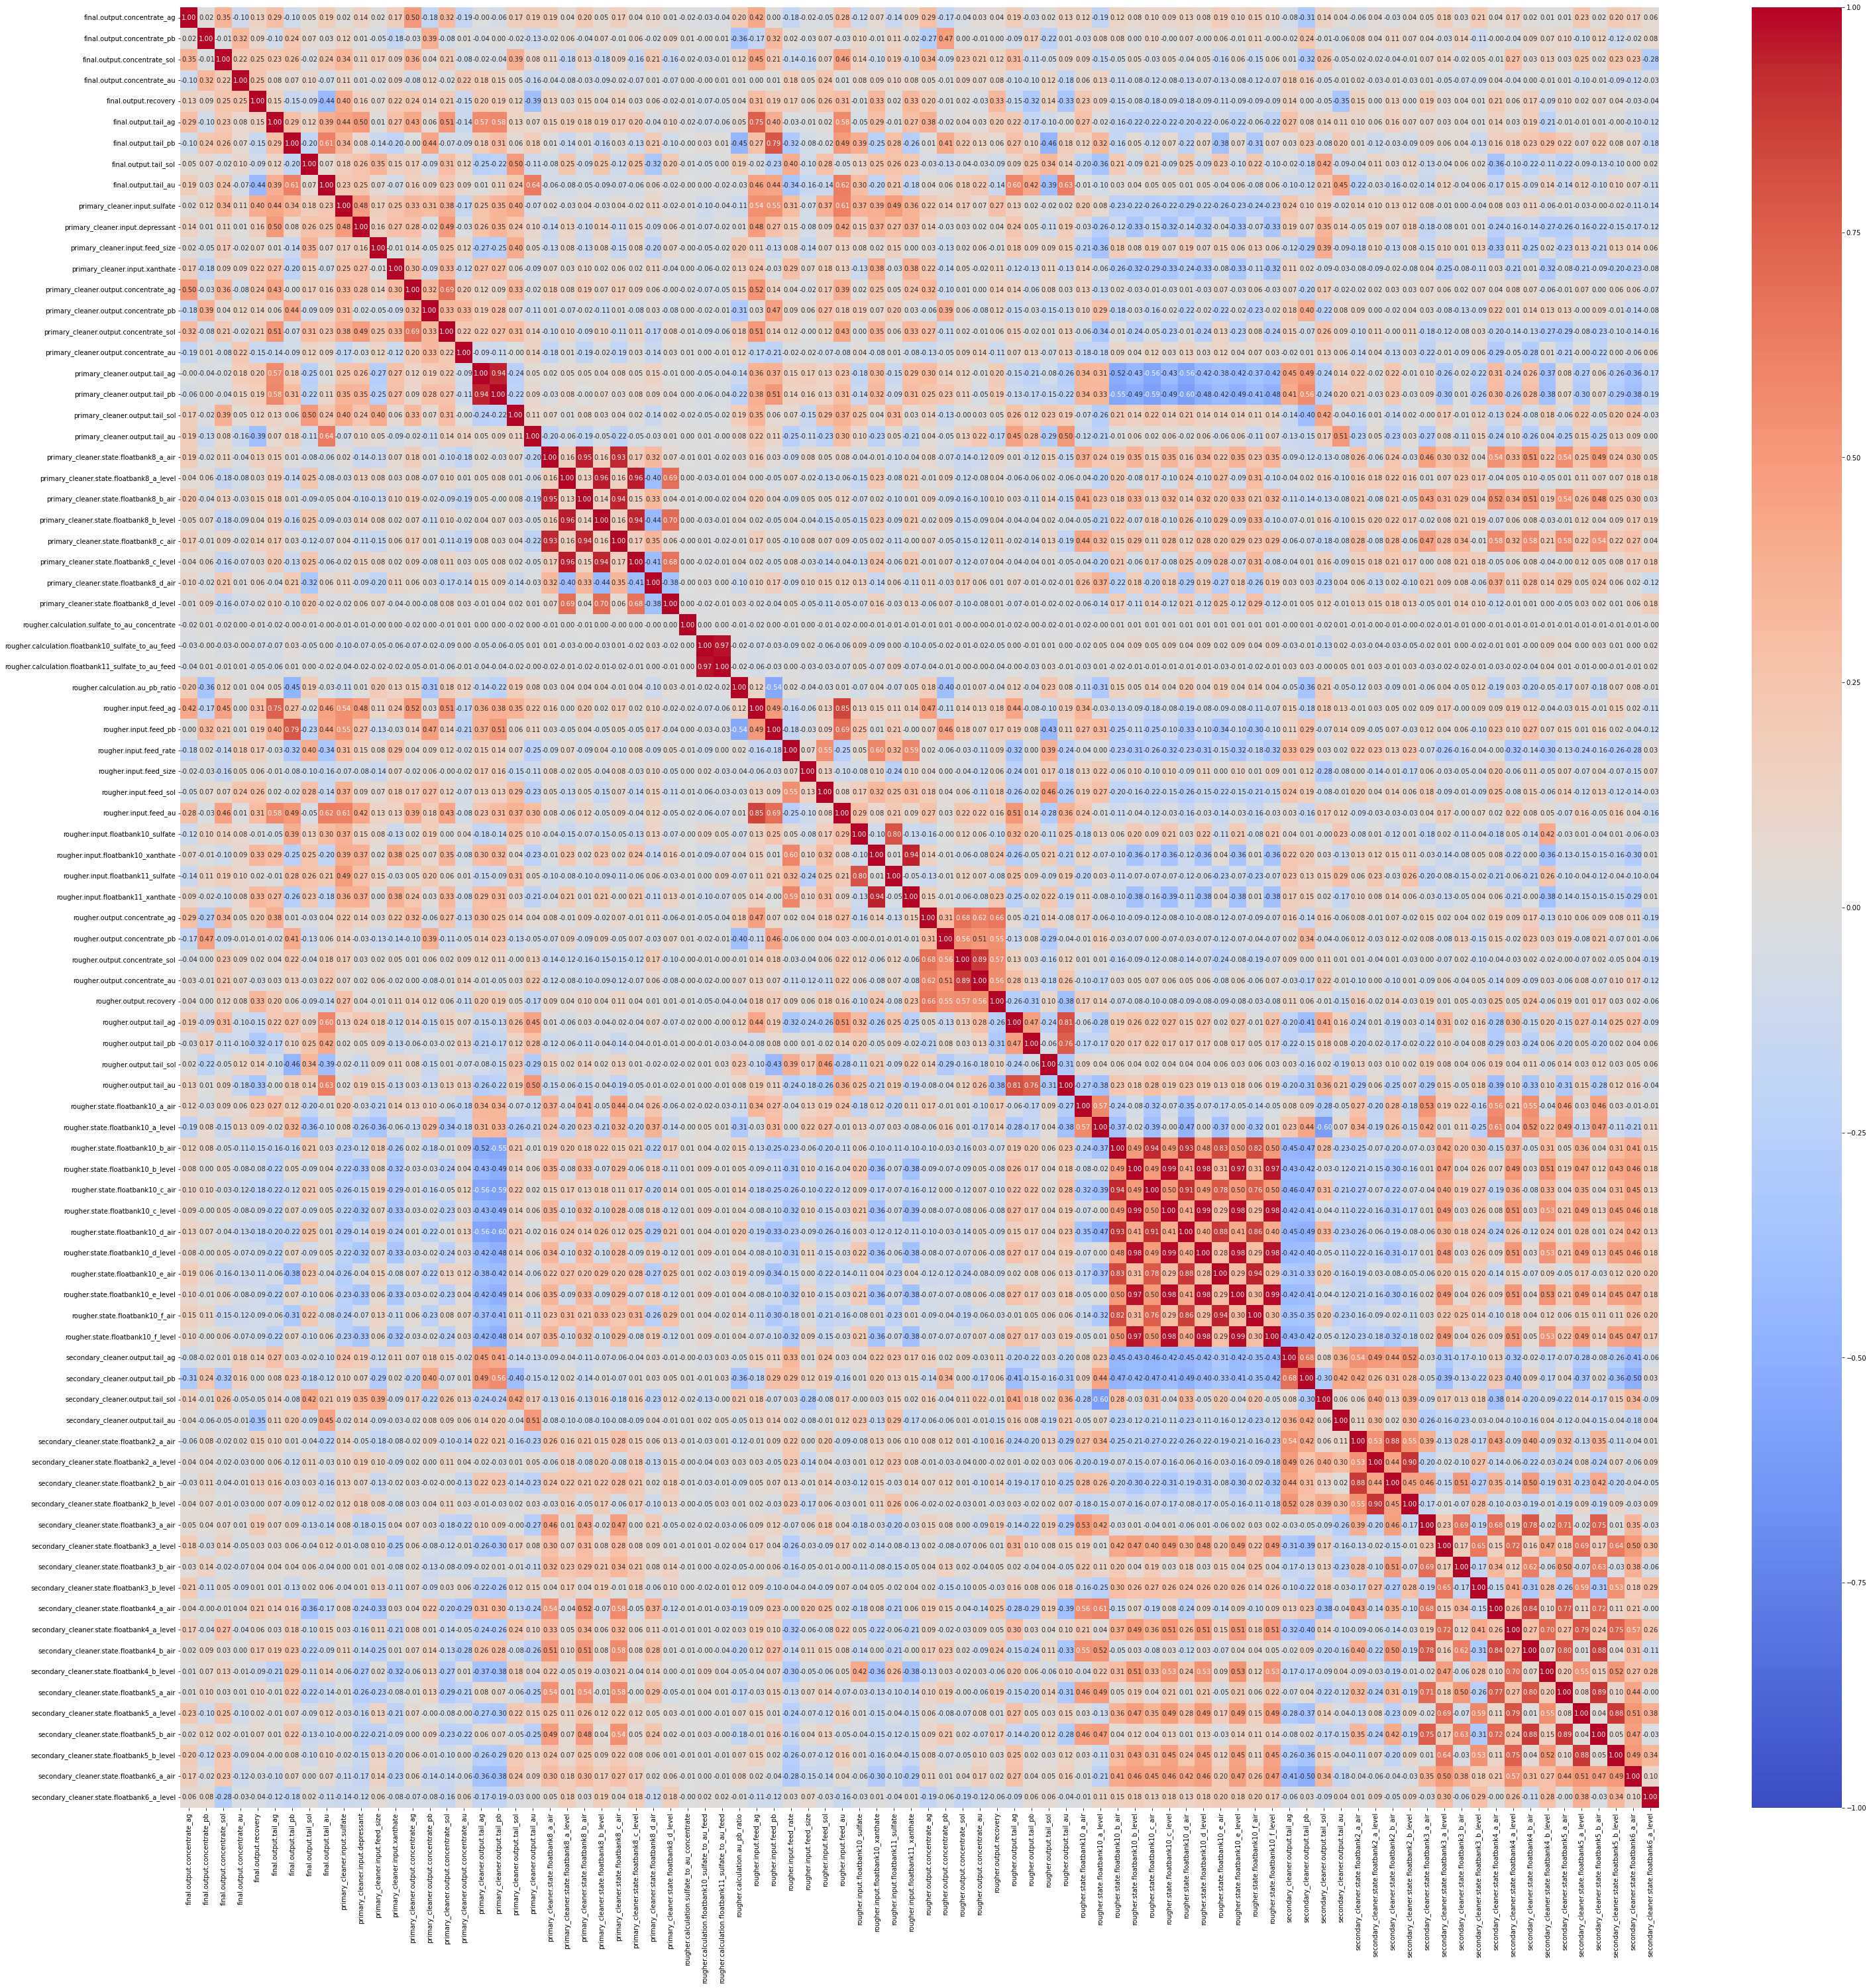

CPU times: total: 18 s
Wall time: 18.1 s


In [11]:
%%time

plt.figure(figsize=(50,50))
sns.heatmap(
    gold_train.corr(), annot=True, fmt = '.2f', 
    vmin=-1, vmax=1, center=0, cmap='coolwarm')
plt.show()

<a name="312"></a> <div style="text-align: right">[Cодержание](#Содержание)</div>
#### Тестовая выборка

Выведем размеры и первые 5 строк данных тестовой выборки `gold_recovery_test_new`. Данные индексируются датой и временем получения информации - признак `date`, поэтому используем признак `date` в качестве индекса.

In [12]:
try:
    gold_test = pd.read_csv('/datasets/gold_recovery_test_new.csv', index_col='date', parse_dates=['date'])
except:
    try:
        gold_test = pd.read_csv(r'C:/Users/lorad/OneDrive/Documents/Моя папка/Data Science/Курсы/'
                                 'Яндекс.Практикум. Специалист по Data Science/Проектная работа/'
                 '09. Сборный Проект - 2/gold_recovery_test_new.csv', index_col='date', parse_dates=['date'])
    except:
        try:
            gold_test = pd.read_csv(r'D:/Юлия/Data Science/Курсы/'
                                     'Яндекс.Практикум. Специалист по Data Science/Проектная работа/'
                '09. Сборный Проект - 2/gold_recovery_test_new.csv', index_col='date', parse_dates=['date'])
        except:
            gold_test = pd.read_csv('https://docs.google.com/spreadsheets/d/e/'
                '2PACX-1vQaXHEB82n2Ht5IFiPHEmqu8_tcWlOZ_kYJFwS6PyxHkQ3byFIksP3KfgRGzvM8ZqHT6YnGd28825PJ/'
                'pub?gid=1358687758&single=true&output=csv', index_col='date', parse_dates=['date'])

In [13]:
gold_test.shape

(5290, 52)

In [14]:
gold_test.head()

primary_cleaner.input.sulfate  \
date                                                 
2016-09-01 00:59:59                     210.800909   
2016-09-01 01:59:59                     215.392455   
2016-09-01 02:59:59                     215.259946   
2016-09-01 03:59:59                     215.336236   
2016-09-01 04:59:59                     199.099327   

                     primary_cleaner.input.depressant  \
date                                                    
2016-09-01 00:59:59                         14.993118   
2016-09-01 01:59:59                         14.987471   
2016-09-01 02:59:59                         12.884934   
2016-09-01 03:59:59                         12.006805   
2016-09-01 04:59:59                         10.682530   

                     primary_cleaner.input.feed_size  \
date                                                   
2016-09-01 00:59:59                         8.080000   
2016-09-01 01:59:59                         8.080000   
2016-09-01 02:59:59                         7.786667   
2016-09-01 03:59:59                         7.640000   
2016-09-01 04:59:59                         7.530000   

                     primary_cleaner.input.xanthate  \
date                                                  
2016-09-01 00:59:59                        1.005021   
2016-09-01 01:59:59                        0.990469   
2016-09-01 02:59:59                        0.996043   
2016-09-01 03:59:59                        0.863514   
2016-09-01 04:59:59                        0.805575   

                     primary_cleaner.state.floatbank8_a_air  \
date                                                          
2016-09-01 00:59:59                             1398.981301   
2016-09-01 01:59:59                             1398.777912   
2016-09-01 02:59:59                             1398.493666   
2016-09-01 03:59:59                             1399.618111   
2016-09-01 04:59:59                             1401.268123   

                     primary_cleaner.state.floatbank8_a_level  \
date                                                            
2016-09-01 00:59:59                               -500.225577   
2016-09-01 01:59:59                               -500.057435   
2016-09-01 02:59:59                               -500.868360   
2016-09-01 03:59:59                               -498.863574   
2016-09-01 04:59:59                               -500.808305   

                     primary_cleaner.state.floatbank8_b_air  \
date                                                          
2016-09-01 00:59:59                             1399.144926   
2016-09-01 01:59:59                             1398.055362   
2016-09-01 02:59:59                             1398.860436   
2016-09-01 03:59:59                             1397.440120   
2016-09-01 04:59:59                             1398.128818   

                     primary_cleaner.state.floatbank8_b_level  \
date                                                            
2016-09-01 00:59:59                               -499.919735   
2016-09-01 01:59:59                               -499.778182   
2016-09-01 02:59:59                               -499.764529   
2016-09-01 03:59:59                               -499.211024   
2016-09-01 04:59:59                               -499.504543   

                     primary_cleaner.state.floatbank8_c_air  \
date                                                          
2016-09-01 00:59:59                             1400.102998   
2016-09-01 01:59:59                             1396.151033   
2016-09-01 02:59:59                             1398.075709   
2016-09-01 03:59:59                             1400.129303   
2016-09-01 04:59:59                             1402.172226   

                     primary_cleaner.state.floatbank8_c_level  \
date                                                            
2016-09-01 00:59:59                               -500.704369   
2016-09-01 01:59:59           

Проверим явные дубликаты в тестовой выборке `gold_recovery_test_new`.

In [15]:
gold_test.duplicated().sum()

0

Выведем общую информацию о тестовой выборке `gold_recovery_test_new`.

In [16]:
gold_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5290 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5286 non-null   float64
 1   primary_cleaner.input.depressant            5285 non-null   float64
 2   primary_cleaner.input.feed_size             5290 non-null   float64
 3   primary_cleaner.input.xanthate              5286 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5290 

Выведем количество пропусков в тестовой выборке `gold_recovery_test_new`.

In [17]:
gold_test.isna().sum()

primary_cleaner.input.sulfate                  4
primary_cleaner.input.depressant               5
primary_cleaner.input.feed_size                0
primary_cleaner.input.xanthate                 4
primary_cleaner.state.floatbank8_a_air         0
primary_cleaner.state.floatbank8_a_level       0
primary_cleaner.state.floatbank8_b_air         0
primary_cleaner.state.floatbank8_b_level       0
primary_cleaner.state.floatbank8_c_air         0
primary_cleaner.state.floatbank8_c_level       0
primary_cleaner.state.floatbank8_d_air         0
primary_cleaner.state.floatbank8_d_level       0
rougher.input.feed_ag                          0
rougher.input.feed_pb                          0
rougher.input.feed_rate                        3
rougher.input.feed_size                        1
rougher.input.feed_sol                        21
rougher.input.feed_au                          0
rougher.input.floatbank10_sulfate              5
rougher.input.floatbank10_xanthate             0
rougher.input.floatb

Выведем числовое описание данных в тестовой выборке, применив метод `.describe()`.

In [18]:
gold_test.describe()

primary_cleaner.input.sulfate  primary_cleaner.input.depressant  \
count                    5286.000000                       5285.000000   
mean                      174.839652                          8.683596   
std                        43.027080                          3.072050   
min                         2.566156                          0.003839   
25%                       147.121401                          6.489555   
50%                       177.828489                          8.052207   
75%                       208.125438                         10.027764   
max                       265.983123                         40.000000   

       primary_cleaner.input.feed_size  primary_cleaner.input.xanthate  \
count                      5290.000000                     5286.000000   
mean                          7.266339                        1.383803   
std                           0.610219                        0.643474   
min                           5.650000                        0.004984   
25%                           6.890000                        0.907623   
50%                           7.250000                        1.197610   
75%                           7.600000                        1.797819   
max                          15.500000                        4.102454   

       primary_cleaner.state.floatbank8_a_air  \
count                            5.290000e+03   
mean                             1.539494e+03   
std                              1.167979e+02   
min                              5.445860e-32   
25%                              1.498936e+03   
50%                              1.585129e+03   
75%                              1.602077e+03   
max                              2.103104e+03   

       primary_cleaner.state.floatbank8_a_level  \
count                               5290.000000   
mean                                -497.665883   
std                                   19.952431   
min                                 -795.316337   
25%                                 -500.357298   
50%                                 -499.969164   
75%                                 -499.568951   
max                                  -57.195404   

       primary_cleaner.state.floatbank8_b_air  \
count                            5.290000e+03   
mean                             1.545174e+03   
std                              1.222246e+02   
min                              6.647490e-32   
25%                              1.498971e+03   
50%                              1.595622e+03   
75%                              1.602324e+03   
max                              1.813084e+03   

       primary_cleaner.state.floatbank8_b_level  \
count                               5290.000000   
mean                                -500.273098   
std                                   32.968307   
min                                 -799.997015   
25%                                 -500.703002   
50%                                 -500.028514   
75%                                 -499.293257   
max                                 -142.527229   

       primary_cleaner.state.floatbank8_c_air  \
count                            5.290000e+03   
mean                             1.527272e+03   
std                              1.225380e+02   
min                              4.033736e-32   
25%                              1.473230e+03   
50%                              1.549595e+03   
75%                              1.601144e+03   
max                              1.715054e+03   

       primary_cleaner.state.floatbank8_c_level  \
count                               5290.000000   
mean                                -498.330680   
std                                   21.964876   
min                                 -799.960571   
25%                                 -501.018117   
50%                                 -500.017711   
75%                                 -498.994130   
max                

Распределение переменных в тестовой выборке `gold_recovery_test_new` аналогично [распределению для обучающей выборки `gold_recovery_train_new`](#гистограмма). 

Тепловая карта (хитмэп) коэффициентов корреляции Пирсона для тестовой выборки `gold_recovery_test_new` также аналогична [тепловой карте для обучающей выборки `gold_recovery_train_new`](#хитмэп).

Не будем выводить эти визуализации, чтобы сократить общее время обработки кода.

В тестовой выборке `gold_recovery_test_new` отсутствуют целевые признаки `rougher.output.recovery` и `final.output.recovery`, а также некоторые признаки, которые могут быть в обучающей выборке `gold_recovery_train_new` (см. раздел [**Описание данных**](#Описание-данных)).

Исходный датасет `gold_recovery_full_new` содержит обучающую и тестовую выборки со всеми признаками.

<a name="313"></a> <div style="text-align: right">[Cодержание](#Содержание)</div>
#### Исходные данные

Выведем размеры и первые 5 строк исходных данных `gold_recovery_full_new`. Данные индексируются датой и временем получения информации - признак `date`, поэтому используем признак `date` в качестве индекса.

In [19]:
try:
    gold_full = pd.read_csv('/datasets/gold_recovery_full_new.csv', index_col='date', parse_dates=['date'])
except:
    try:
        gold_full = pd.read_csv(r'C:/Users/lorad/OneDrive/Documents/Моя папка/Data Science/Курсы/'
                                 'Яндекс.Практикум. Специалист по Data Science/Проектная работа/'
                '09. Сборный Проект - 2/gold_recovery_full_new.csv', index_col='date', parse_dates=['date'])
    except:
        try:
            gold_full = pd.read_csv(r'D:/Юлия/Data Science/Курсы/'
                                     'Яндекс.Практикум. Специалист по Data Science/Проектная работа/'
                '09. Сборный Проект - 2/gold_recovery_full_new.csv', index_col='date', parse_dates=['date'])
        except:
            gold_full = pd.read_csv('https://docs.google.com/spreadsheets/d/e/'
                '2PACX-1vTyg7El2Q6VsiUamOZKmKGJDhgC_0ESv3u13ySDDCQ7KDOltDswpW9ItJ8HQbAEsq9C5tHA6zFByB19/'
                'pub?gid=480689976&single=true&output=csv', index_col='date', parse_dates=['date'])

In [20]:
gold_full.shape

(19439, 86)

In [21]:
gold_full.head()

final.output.concentrate_ag  final.output.concentrate_pb  \
date                                                                            
2016-01-15 00:00:00                     6.055403                     9.889648   
2016-01-15 01:00:00                     6.029369                     9.968944   
2016-01-15 02:00:00                     6.055926                    10.213995   
2016-01-15 03:00:00                     6.047977                     9.977019   
2016-01-15 04:00:00                     6.148599                    10.142511   

                     final.output.concentrate_sol  \
date                                                
2016-01-15 00:00:00                      5.507324   
2016-01-15 01:00:00                      5.257781   
2016-01-15 02:00:00                      5.383759   
2016-01-15 03:00:00                      4.858634   
2016-01-15 04:00:00                      4.939416   

                     final.output.concentrate_au  final.output.recovery  \
date                                                                      
2016-01-15 00:00:00                    42.192020              70.541216   
2016-01-15 01:00:00                    42.701629              69.266198   
2016-01-15 02:00:00                    42.657501              68.116445   
2016-01-15 03:00:00                    42.689819              68.347543   
2016-01-15 04:00:00                    42.774141              66.927016   

                     final.output.tail_ag  final.output.tail_pb  \
date                                                              
2016-01-15 00:00:00             10.411962              0.895447   
2016-01-15 01:00:00             10.462676              0.927452   
2016-01-15 02:00:00             10.507046              0.953716   
2016-01-15 03:00:00             10.422762              0.883763   
2016-01-15 04:00:00             10.360302              0.792826   

                     final.output.tail_sol  final.output.tail_au  \
date                                                               
2016-01-15 00:00:00              16.904297              2.143149   
2016-01-15 01:00:00              16.634514              2.224930   
2016-01-15 02:00:00              16.208849              2.257889   
2016-01-15 03:00:00              16.532835              2.146849   
2016-01-15 04:00:00              16.525686              2.055292   

                     primary_cleaner.input.sulfate  \
date                                                 
2016-01-15 00:00:00                     127.092003   
2016-01-15 01:00:00                     125.629232   
2016-01-15 02:00:00                     123.819808   
2016-01-15 03:00:00                     122.270188   
2016-01-15 04:00:00                     117.988169   

                     primary_cleaner.input.depressant  \
date                                                    
2016-01-15 00:00:00                         10.128295   
2016-01-15 01:00:00                         10.296251   
2016-01-15 02:00:00                         11.316280   
2016-01-15 03:00:00                         11.322140   
2016-01-15 04:00:00                         11.913613   

                     primary_cleaner.input.feed_size  \
date                                                   
2016-01-15 00:00:00                             7.25   
2016-01-15 01:00:00                             7.25   
2016-01-15 02:00:00                             7.25   
2016-01-15 03:00:00                             7.25   
2016-01-15 04:00:00                             7.25   

                     primary_cleaner.input.xanthate  \
date                                                  
2016-01-15 00:00:00                        0.988759   
2016-01-15 01:00:00                        1.002663   
2016-01-15 02:00:00                        0.991265   
2016-01-15 03:00:00                        0.996739   
2016-01-15 04:00:00                        1.009869   

                     primary_cleaner.output.concen

Проверим явные дубликаты в исходных данных `gold_recovery_full_new`.

In [22]:
gold_full.duplicated().sum()

0

Выведем общую информацию об исходных данных `gold_recovery_full_new`.

In [23]:
gold_full.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19439 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         19438 non-null  float64
 1   final.output.concentrate_pb                         19438 non-null  float64
 2   final.output.concentrate_sol                        19228 non-null  float64
 3   final.output.concentrate_au                         19439 non-null  float64
 4   final.output.recovery                               19439 non-null  float64
 5   final.output.tail_ag                                19438 non-null  float64
 6   final.output.tail_pb                                19338 non-null  float64
 7   final.output.tail_sol                               19433 non-null  float64
 8   final.output.tail_au                     

Выведем количество пропусков в исходных данных `gold_recovery_full_new`.

In [24]:
gold_full.isna().sum()

final.output.concentrate_ag                              1
final.output.concentrate_pb                              1
final.output.concentrate_sol                           211
final.output.concentrate_au                              0
final.output.recovery                                    0
final.output.tail_ag                                     1
final.output.tail_pb                                   101
final.output.tail_sol                                    6
final.output.tail_au                                     0
primary_cleaner.input.sulfate                           24
primary_cleaner.input.depressant                        37
primary_cleaner.input.feed_size                          0
primary_cleaner.input.xanthate                         104
primary_cleaner.output.concentrate_ag                    0
primary_cleaner.output.concentrate_pb                  116
primary_cleaner.output.concentrate_sol                 370
primary_cleaner.output.concentrate_au                   

Выведем числовое описание исходных данных, применив метод `.describe()`.

In [25]:
gold_full.describe()

final.output.concentrate_ag  final.output.concentrate_pb  \
count                 19438.000000                 19438.000000   
mean                      5.168470                     9.978895   
std                       1.372348                     1.669240   
min                       0.000000                     0.000000   
25%                       4.251240                     9.137262   
50%                       5.066094                    10.102433   
75%                       5.895527                    11.035769   
max                      16.001945                    17.031899   

       final.output.concentrate_sol  final.output.concentrate_au  \
count                  19228.000000                 19439.000000   
mean                       9.501224                    44.076513   
std                        2.787537                     5.129784   
min                        0.000000                     0.000000   
25%                        7.722820                    43.402215   
50%                        9.218961                    45.011244   
75%                       10.947813                    46.275313   
max                       19.615720                    52.756638   

       final.output.recovery  final.output.tail_ag  final.output.tail_pb  \
count           19439.000000          19438.000000          19338.000000   
mean               67.050208              9.688589              2.705795   
std                10.125840              2.328642              0.949077   
min                 0.000000              0.000000              0.000000   
25%                63.299712              8.062878              2.040119   
50%                68.172738              9.743623              2.748730   
75%                72.686642             11.134294              3.333216   
max               100.000000             19.552149              5.804178   

       final.output.tail_sol  final.output.tail_au  \
count           19433.000000          19439.000000   
mean               10.583728              3.042467   
std                 2.868782              0.922808   
min                 0.000000              0.000000   
25%                 8.938947              2.461138   
50%                10.622456              2.984909   
75%                12.104271              3.571351   
max                22.317730              8.245022   

       primary_cleaner.input.sulfate  primary_cleaner.input.depressant  \
count                   19415.000000                      19402.000000   
mean                      144.624774                          8.817039   
std                        44.464071                          3.286186   
min                         0.003112                          0.000000   
25%                       114.107029                          6.076909   
50%                       143.232103                          8.038311   
75%                       175.075656                         11.013521   
max                       265.983123                         40.000000   

       primary_cleaner.input.feed_size  primary_cleaner.input.xanthate  \
count                     19439.000000                    19335.000000   
mean                          7.307078                        1.021795   
std                           0.613509                        0.513254   
min                           1.080000                        0.000005   
25%                           6.940000                        0.697224   
50%                           7.280000                        0.940863   
75%                           7.670000                        1.210990   
max                          15.500000                        4.102454   

       primary_cleaner.output.concentrate_ag  \
count                           19439.000000   
mean                                8.442408   
std                                 2.054465   
min                                 0.000000   
25%                                 7.263288

Распределение переменных в исходных данных `gold_recovery_full_new` аналогично [распределению для обучающей выборки `gold_recovery_train_new`](#гистограмма). Не будем выводить эту визуализацию, чтобы сократить общее время обработки кода.

Отдельно визуализируем распределение целевых признаков `rougher.output.recovery` и `final.output.recovery` в исходных данных `gold_recovery_full_new`.

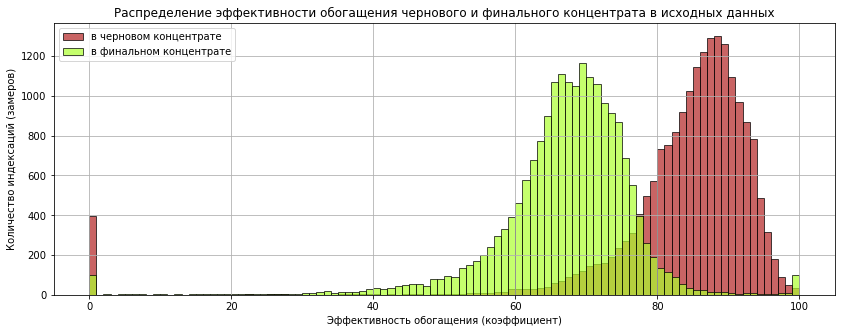

In [26]:
gold_full['rougher.output.recovery']\
.hist(figsize=(14, 5), bins=100, alpha=0.7, 
     color='firebrick', edgecolor = 'black')

gold_full['final.output.recovery']\
.hist(figsize=(14, 5), bins=100, alpha=0.7, 
     color='greenyellow', edgecolor = 'black')

plt.grid(True)
plt.legend(['в черновом концентрате', 
            'в финальном концентрате'])
plt.xlabel('Эффективность обогащения (коэффициент)')
plt.ylabel('Количество индексаций (замеров)')
plt.title('Распределение эффективности обогащения чернового и '
          'финального концентрата в исходных данных')
plt.show()

Тепловая карта (хитмэп) коэффициентов корреляции Пирсона для исходных данных `gold_recovery_full_new` также аналогична [тепловой карте для обучающей выборки `gold_recovery_train_new`](#хитмэп). Не будем выводить эту визуализацию, чтобы сократить общее время обработки кода.

<a name="314"></a> <div style="text-align: right">[Cодержание](#Содержание)</div>
#### Дополнение

Расположим признаки датасета с исходными данными (`gold_recovery_full_new`) в порядке, примерно отражающем последовательность стадий выполнения технологичекского процесса:

- rougher — флотация;
- primary_cleaner — первичная очистка;
- secondary_cleaner — вторичная очистка;
- final — финальные характеристики.

Слева сохранены индексы из датасета с исходными данными. Справа - количество ненулевых значений и комментарии.

 ```
 0   date                                                19439 non-null # индексация данных датой и временем (замеры) 
 39  rougher.input.feed_au                               19439 non-null  
 34  rougher.input.feed_ag                               19439 non-null  
 35  rougher.input.feed_pb                               19339 non-null  
 38  rougher.input.feed_sol                              19340 non-null  
 37  rougher.input.feed_size                             19294 non-null  
 36  rougher.input.feed_rate                             19428 non-null  
 40  rougher.input.floatbank10_sulfate                   19405 non-null  
 41  rougher.input.floatbank10_xanthate                  19431 non-null  
 42  rougher.input.floatbank11_sulfate                   19395 non-null  
 43  rougher.input.floatbank11_xanthate                  18986 non-null  
 53  rougher.state.floatbank10_a_air                     19438 non-null  
 54  rougher.state.floatbank10_a_level                   19438 non-null  
 55  rougher.state.floatbank10_b_air                     19438 non-null  
 56  rougher.state.floatbank10_b_level                   19438 non-null  
 57  rougher.state.floatbank10_c_air                     19438 non-null  
 58  rougher.state.floatbank10_c_level                   19438 non-null  
 59  rougher.state.floatbank10_d_air                     19439 non-null  
 60  rougher.state.floatbank10_d_level                   19439 non-null  
 61  rougher.state.floatbank10_e_air                     19003 non-null  
 62  rougher.state.floatbank10_e_level                   19439 non-null  
 63  rougher.state.floatbank10_f_air                     19439 non-null  
 64  rougher.state.floatbank10_f_level                   19439 non-null  
 31  rougher.calculation.floatbank10_sulfate_to_au_feed  19437 non-null # признак отсутствует в тестовой выборке
 32  rougher.calculation.floatbank11_sulfate_to_au_feed  19437 non-null # признак отсутствует в тестовой выборке
 33  rougher.calculation.au_pb_ratio                     19439 non-null # признак отсутствует в тестовой выборке
 30  rougher.calculation.sulfate_to_au_concentrate       19437 non-null # признак отсутствует в тестовой выборке
 47  rougher.output.concentrate_au                       19439 non-null # признак отсутствует в тестовой выборке
 44  rougher.output.concentrate_ag                       19439 non-null # признак отсутствует в тестовой выборке
 45  rougher.output.concentrate_pb                       19439 non-null # признак отсутствует в тестовой выборке
 46  rougher.output.concentrate_sol                      19416 non-null # признак отсутствует в тестовой выборке
 52  rougher.output.tail_au                              19439 non-null # признак отсутствует в тестовой выборке
 49  rougher.output.tail_ag                              19438 non-null # признак отсутствует в тестовой выборке
 50  rougher.output.tail_pb                              19439 non-null # признак отсутствует в тестовой выборке
 51  rougher.output.tail_sol                             19439 non-null # признак отсутствует в тестовой выборке
 48  rougher.output.recovery                             19439 non-null # целевой признак (нет в тестовой выборке)
 13  primary_cleaner.input.xanthate                      19335 non-null  
 10  primary_cleaner.input.sulfate                       19415 non-null  
 11  primary_cleaner.input.depressant                    19402 non-null  
 12  primary_cleaner.input.feed_size                     19439 non-null  
 22  primary_cleaner.state.floatbank8_a_air              19435 non-null  
 23  primary_cleaner.state.floatbank8_a_level            19438 non-null  
 24  primary_cleaner.state.floatbank8_b_air              19435 non-null  
 25  primary_cleaner.state.floatbank8_b_level            19438 non-null  
 26  primary_cleaner.state.floatbank8_c_air              19437 non-null  
 27  primary_cleaner.state.floatbank8_c_level            19438 non-null  
 28  primary_cleaner.state.floatbank8_d_air              19436 non-null  
 29  primary_cleaner.state.floatbank8_d_level            19438 non-null  
 17  primary_cleaner.output.concentrate_au               19439 non-null # признак отсутствует в тестовой выборке
 14  primary_cleaner.output.concentrate_ag               19439 non-null # признак отсутствует в тестовой выборке
 15  primary_cleaner.output.concentrate_pb               19323 non-null # признак отсутствует в тестовой выборке
 16  primary_cleaner.output.concentrate_sol              19069 non-null # признак отсутствует в тестовой выборке
 21  primary_cleaner.output.tail_au                      19439 non-null # признак отсутствует в тестовой выборке
 18  primary_cleaner.output.tail_ag                      19435 non-null # признак отсутствует в тестовой выборке
 19  primary_cleaner.output.tail_pb                      19418 non-null # признак отсутствует в тестовой выборке
 20  primary_cleaner.output.tail_sol                     19377 non-null # признак отсутствует в тестовой выборке
 69  secondary_cleaner.state.floatbank2_a_air            19219 non-null  
 70  secondary_cleaner.state.floatbank2_a_level          19438 non-null  
 71  secondary_cleaner.state.floatbank2_b_air            19416 non-null  
 72  secondary_cleaner.state.floatbank2_b_level          19438 non-null  
 73  secondary_cleaner.state.floatbank3_a_air            19426 non-null  
 74  secondary_cleaner.state.floatbank3_a_level          19438 non-null  
 75  secondary_cleaner.state.floatbank3_b_air            19438 non-null  
 76  secondary_cleaner.state.floatbank3_b_level          19438 non-null  
 77  secondary_cleaner.state.floatbank4_a_air            19433 non-null  
 78  secondary_cleaner.state.floatbank4_a_level          19438 non-null  
 79  secondary_cleaner.state.floatbank4_b_air            19438 non-null  
 80  secondary_cleaner.state.floatbank4_b_level          19438 non-null  
 81  secondary_cleaner.state.floatbank5_a_air            19438 non-null  
 82  secondary_cleaner.state.floatbank5_a_level          19438 non-null  
 83  secondary_cleaner.state.floatbank5_b_air            19438 non-null  
 84  secondary_cleaner.state.floatbank5_b_level          19438 non-null  
 85  secondary_cleaner.state.floatbank6_a_air            19437 non-null  
 86  secondary_cleaner.state.floatbank6_a_level          19438 non-null  
 68  secondary_cleaner.output.tail_au                    19439 non-null # признак отсутствует в тестовой выборке
 65  secondary_cleaner.output.tail_ag                    19437 non-null # признак отсутствует в тестовой выборке
 66  secondary_cleaner.output.tail_pb                    19427 non-null # признак отсутствует в тестовой выборке
 67  secondary_cleaner.output.tail_sol                   17691 non-null # признак отсутствует в тестовой выборке
 4   final.output.concentrate_au                         19439 non-null # признак отсутствует в тестовой выборке
 1   final.output.concentrate_ag                         19438 non-null # признак отсутствует в тестовой выборке
 2   final.output.concentrate_pb                         19438 non-null # признак отсутствует в тестовой выборке
 3   final.output.concentrate_sol                        19228 non-null # признак отсутствует в тестовой выборке
 9   final.output.tail_au                                19439 non-null # признак отсутствует в тестовой выборке
 6   final.output.tail_ag                                19438 non-null # признак отсутствует в тестовой выборке
 7   final.output.tail_pb                                19338 non-null # признак отсутствует в тестовой выборке
 8   final.output.tail_sol                               19433 non-null # признак отсутствует в тестовой выборке
 5   final.output.recovery                               19439 non-null # целевой признак (нет в тестовой выборке)
 ```

<a name="315"></a> <div style="text-align: right">[Cодержание](#Содержание)</div>
#### Вывод по п. 3.1

В подразделе [**Исследование данных**](#Исследование-данных) изучена общая информация о следующих данных:
1. обучающая выборка `gold_recovery_train_new`;
2. тестовая выборка `gold_recovery_test_new`;
3. исходные данные `gold_recovery_full_new`.


В результате выполнения задач этого подраздела было выявлено следующее:
1. Пропуски в данных занимают незначительное количество. 
2. Все признаки, кроме `date`, имеют вещественный тип `float`. 
3. Явных дубликатов нет. 
4. Распределение признаков очень разноообразно, при этом все признаки (кроме `date`) - количественные. В частности, распределение целевых признаков имеет отрицательную асимметрию (смещено влево). Сложно сказать, подчиняется ли оно какому-либо стандартному закону.
5. В распределении признаков присутствуют аномальные значения концентраций, равные у нулю (пик слева).
6. Корреляционный анализ показал, что в данных присутствует сильная зависимость между некоторыми величинами, связанными с:
    - концентрациями металлов в руде (между серебром (`ag`) и свинцом (`pb`), золотом (`au`) и растворителем/коллоидом (`sol`, *solvent aka*));
    - применением реагентов ксантогенат (`xanthate`) и сульфат (`sulphate`);
    - зависимыми между собой последовательными технологическими процессами обработки воздухом смеси частиц руды с водой (параметры `.state.floatbankX_a_air`, `.state.floatbankX_b_air` и т.д.).
7. Целевые признаки `rougher.output.recovery` (эффективность обогащения чернового концентрата) и `final.output.recovery` (эффективность обогащения финального концентрата) - количественные, а значит для их предсказания решается задача регрессии.

**В проекте решается задача регрессии.**

<a name="32"></a> <div style="text-align: right">[Cодержание](#Содержание)</div>
### Расчёт эффективности обогащения

Проверим, что эффективность обогащения (значение признака) рассчитана правильно. Вычислим её на обучающей выборке для признака `rougher.output.recovery`. Найдём *MAE* между нашими расчётами и значением признака. Опишем выводы.

Напомним:

1. Эффективность обогащения рассчитывается по формуле:


$$
Recovery = {{C \times (F - T)} \over {F \times (C - T)}} \times 100\%
$$

где:
- $C$ — доля золота в концентрате после флотации/очистки (`rougher.output.concentrate_au`);
- $F$ — доля золота в сырье/концентрате до флотации/очистки (`rougher.input.feed_au`);
- $T$ — доля золота в отвальных хвостах после флотации/очистки (`rougher.output.tail_au`).

2. Среднее абсолютное отклонение ***MAE*** для линейной регрессии в общем виде рассчитывается так:

```
mae = mean_absolute_error(target_valid, predicted_valid)
```

Вычислим эффективность обогащения `recovery` на обучающей выборке `gold_recovery_train_new` для признака `rougher.output.recovery` и запишем её значения в новый признак `rougher_output_recovery_predicted`.

In [27]:
c = gold_train['rougher.output.concentrate_au']
f = gold_train['rougher.input.feed_au']
t = gold_train['rougher.output.tail_au']
recovery = ((c * (f - t))/(f * (c - t))) * 100

gold_train['rougher_output_recovery_predicted'] = recovery
gold_train.head()

final.output.concentrate_ag  final.output.concentrate_pb  \
date                                                                            
2016-01-15 00:00:00                     6.055403                     9.889648   
2016-01-15 01:00:00                     6.029369                     9.968944   
2016-01-15 02:00:00                     6.055926                    10.213995   
2016-01-15 03:00:00                     6.047977                     9.977019   
2016-01-15 04:00:00                     6.148599                    10.142511   

                     final.output.concentrate_sol  \
date                                                
2016-01-15 00:00:00                      5.507324   
2016-01-15 01:00:00                      5.257781   
2016-01-15 02:00:00                      5.383759   
2016-01-15 03:00:00                      4.858634   
2016-01-15 04:00:00                      4.939416   

                     final.output.concentrate_au  final.output.recovery  \
date                                                                      
2016-01-15 00:00:00                    42.192020              70.541216   
2016-01-15 01:00:00                    42.701629              69.266198   
2016-01-15 02:00:00                    42.657501              68.116445   
2016-01-15 03:00:00                    42.689819              68.347543   
2016-01-15 04:00:00                    42.774141              66.927016   

                     final.output.tail_ag  final.output.tail_pb  \
date                                                              
2016-01-15 00:00:00             10.411962              0.895447   
2016-01-15 01:00:00             10.462676              0.927452   
2016-01-15 02:00:00             10.507046              0.953716   
2016-01-15 03:00:00             10.422762              0.883763   
2016-01-15 04:00:00             10.360302              0.792826   

                     final.output.tail_sol  final.output.tail_au  \
date                                                               
2016-01-15 00:00:00              16.904297              2.143149   
2016-01-15 01:00:00              16.634514              2.224930   
2016-01-15 02:00:00              16.208849              2.257889   
2016-01-15 03:00:00              16.532835              2.146849   
2016-01-15 04:00:00              16.525686              2.055292   

                     primary_cleaner.input.sulfate  \
date                                                 
2016-01-15 00:00:00                     127.092003   
2016-01-15 01:00:00                     125.629232   
2016-01-15 02:00:00                     123.819808   
2016-01-15 03:00:00                     122.270188   
2016-01-15 04:00:00                     117.988169   

                     primary_cleaner.input.depressant  \
date                                                    
2016-01-15 00:00:00                         10.128295   
2016-01-15 01:00:00                         10.296251   
2016-01-15 02:00:00                         11.316280   
2016-01-15 03:00:00                         11.322140   
2016-01-15 04:00:00                         11.913613   

                     primary_cleaner.input.feed_size  \
date                                                   
2016-01-15 00:00:00                             7.25   
2016-01-15 01:00:00                             7.25   
2016-01-15 02:00:00                             7.25   
2016-01-15 03:00:00                             7.25   
2016-01-15 04:00:00                             7.25   

                     primary_cleaner.input.xanthate  \
date                                                  
2016-01-15 00:00:00                        0.988759   
2016-01-15 01:00:00                        1.002663   
2016-01-15 02:00:00                        0.991265   
2016-01-15 03:00:00                        0.996739   
2016-01-15 04:00:00                        1.009869   

                     primary_cleaner.output.concen

<a name="пропуски"></a>
Перед расчётом *MAE* необходимо заполнить пропуски в данных. Т.к. наши данные - это последовательные этапы технологического процесса (замеры), то пропуски можно заполнить следующим/предыдущим значением (см. раздел [**Описание данных**](#Описание-данных) и пункт [3.1.4  Дополнение](#Дополнение)). Воспользуемся методом `.ffill()` вдоль строк.

In [28]:
gold_train = gold_train.ffill(axis=0)
gold_test = gold_test.ffill(axis=0)
gold_full = gold_full.ffill(axis=0)

Найдём *MAE* между нашими расчётами и значением признака.

In [29]:
mae = mean_absolute_error(
    gold_train['rougher.output.recovery'], 
    gold_train['rougher_output_recovery_predicted']
)
display(mae)

9.73512347450521e-15

In [30]:
gold_train[['rougher.output.recovery', 
            'rougher_output_recovery_predicted']].head()

rougher.output.recovery  \
date                                           
2016-01-15 00:00:00                87.107763   
2016-01-15 01:00:00                86.843261   
2016-01-15 02:00:00                86.842308   
2016-01-15 03:00:00                87.226430   
2016-01-15 04:00:00                86.688794   

                     rougher_output_recovery_predicted  
date                                                    
2016-01-15 00:00:00                          87.107763  
2016-01-15 01:00:00                          86.843261  
2016-01-15 02:00:00                          86.842308  
2016-01-15 03:00:00                          87.226430  
2016-01-15 04:00:00                          86.688794

Среднее абсолютное отклонение ***MAE*** между нашими расчётами `rougher_output_recovery_predicted` и значением признака `rougher.output.recovery` составляет $9.7*10^{-15}$. Можно сделать вывод, что эффективность обогащения рассчитана правильно.

<a name="33"></a> <div style="text-align: right">[Cодержание](#Содержание)</div>
### Анализ признаков, недоступных в тестовой выборке

Проанализируем признаки, недоступные в тестовой выборке. Что это за параметры? К какому типу относятся?

Выведем признаки, которые отсутствуют в тестовой выборке `gold_recovery_test_new`.

In [31]:
gold_train_columns_remains = \
set(gold_train.columns) - set(gold_test.columns)

gold_train_remains = gold_train[list(gold_train_columns_remains)]
display(list(gold_train_remains))

['secondary_cleaner.output.tail_sol',
 'final.output.recovery',
 'final.output.tail_au',
 'secondary_cleaner.output.tail_ag',
 'rougher.output.concentrate_ag',
 'primary_cleaner.output.tail_pb',
 'rougher.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'primary_cleaner.output.concentrate_ag',
 'rougher.output.concentrate_sol',
 'rougher.output.tail_au',
 'secondary_cleaner.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_ag',
 'final.output.concentrate_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'final.output.concentrate_pb',
 'secondary_cleaner.output.tail_pb',
 'rougher.output.tail_pb',
 'rougher.output.concentrate_au',
 'final.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'rougher.output.recovery',
 'primary_cleaner.output.tail_ag',
 'rougher.calculation.au_pb_ratio',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_sol',


Наименование признаков имеет такой вид:

`[этап].[тип_параметра].[название_параметра]`.

Признаки, недоступные в тестовой выборке, имеют следующие типы и параметры (они также указаны в пункте [3.1.4  Дополнение](#Дополнение)):

- `output.concentrate` - концентрация металлов (золота `au`, серебра `ag`, свинца `pb`) и растворителя/коллоида (`sol`, *solvent aka*) в продукте (`output`) на различных этапах очистки;
- `output.tail` - отвальные хвосты (`tail`) продукта (`output`) на различных этапах очистки;
- `calculation` — расчётные характеристики:
  - `rougher.calculation.au_pb_ratio` - расчётные характеристики соотношения золота (`au`) и свинца (`pb`) в исходном сырье (`rougher`);
  - `rougher.calculation.floatbank10_sulfate_to_au_feed` и `rougher.calculation.floatbank11_sulfate_to_au_feed` - расчётные характеристики подачи (`feed`) сульфата (`sulfate`) и золота (`au`) в исходном сырье (`rougher`) во флотационной установке (`floatbank`) (10-й и 11-й этапы);
  - `rougher.calculation.sulfate_to_au_concentrate` - расчётные характеристики концентраций (`concentrate`) сульфата (`sulfate`) и золота (`au`) в исходном сырье (`rougher`).

**Целевые признаки:**

- `rougher.output.recovery` - эффективность обогащения чернового концентрата;
- `final.output.recovery` - эффективность обогащения финального концентрата.

Некоторые параметры в тестовой выборке замеряются и/или рассчитываются значительно позднее. Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей. Также в тестовом наборе нет целевых признаков.

<a name="34"></a> <div style="text-align: right">[Cодержание](#Содержание)</div>
### Предобработка данных

В подразделе [**Расчёт эффективности обогащения**](#Расчёт-эффективности-обогащения) уже была проведена [обработка пропусков](#пропуски) в данных. Дополним предобработку данных.

В дальнейшем для проверки работы модели нам понадобятся целевые признаки `rougher.output.recovery` и `final.output.recovery` для тестовой выборки `gold_recovery_test_new`.

Выделим целевые признаки `rougher.output.recovery` и `final.output.recovery` из исходных данных `gold_recovery_full_new` по индексам тестовой выборки `gold_recovery_test_new` и введём две переменные:
- `features_test` - признаки в тестовой выборке `gold_recovery_test_new`;
- `target_test` - переменная с целевыми признаками `rougher.output.recovery` (индекс "0") и `final.output.recovery` (индекс "1") в тестовой выборке `gold_recovery_test_new`, соотвествтенно.

Напомним, что в качестве индекса датафреймов мы используем признак `date`.

In [32]:
# признаки
features = gold_test.columns
# целевые признаки
targets = ['rougher.output.recovery', 'final.output.recovery']

features_test = gold_test[features].reset_index(drop=True)
target_test = gold_full[targets].loc[gold_test.index]\
.reset_index(drop=True)

Выведем признаки в тестовой выборке `gold_recovery_test_new`.

In [33]:
features_test.head()

primary_cleaner.input.sulfate  primary_cleaner.input.depressant  \
0                     210.800909                         14.993118   
1                     215.392455                         14.987471   
2                     215.259946                         12.884934   
3                     215.336236                         12.006805   
4                     199.099327                         10.682530   

   primary_cleaner.input.feed_size  primary_cleaner.input.xanthate  \
0                         8.080000                        1.005021   
1                         8.080000                        0.990469   
2                         7.786667                        0.996043   
3                         7.640000                        0.863514   
4                         7.530000                        0.805575   

   primary_cleaner.state.floatbank8_a_air  \
0                             1398.981301   
1                             1398.777912   
2                             1398.493666   
3                             1399.618111   
4                             1401.268123   

   primary_cleaner.state.floatbank8_a_level  \
0                               -500.225577   
1                               -500.057435   
2                               -500.868360   
3                               -498.863574   
4                               -500.808305   

   primary_cleaner.state.floatbank8_b_air  \
0                             1399.144926   
1                             1398.055362   
2                             1398.860436   
3                             1397.440120   
4                             1398.128818   

   primary_cleaner.state.floatbank8_b_level  \
0                               -499.919735   
1                               -499.778182   
2                               -499.764529   
3                               -499.211024   
4                               -499.504543   

   primary_cleaner.state.floatbank8_c_air  \
0                             1400.102998   
1                             1396.151033   
2                             1398.075709   
3                             1400.129303   
4                             1402.172226   

   primary_cleaner.state.floatbank8_c_level  \
0                               -500.704369   
1                               -499.240168   
2                               -502.151509   
3                               -498.355873   
4                               -500.810606   

   primary_cleaner.state.floatbank8_d_air  \
0                             1399.001695   
1                             1399.508091   
2                             1399.497088   
3                             1401.065165   
4                             1399.480508   

   primary_cleaner.state.floatbank8_d_level  rougher.input.feed_ag  \
0                               -499.485144              13.128569   
1                               -500.416324              13.036280   
2                               -499.715479              13.138412   
3                               -501.038738              12.400507   
4                               -499.374053              11.327427   

   rougher.input.feed_pb  rougher.input.feed_rate  rougher.input.feed_size  \
0               5.636710               489.793655                62.710452   
1               5.526065               490.104534                61.961163   
2               5.426561               489.617969                66.903807   
3               5.114758               476.618130                59.865919   
4               4.767383               488.248117                63.315324   

   rougher.input.feed_sol  rougher.input.feed_au  \
0               42.022440              12.084103   
1               41.187903              11.918977   
2               42.546294              12.091332   
3               41.060195              12.181597   
4               41.269161              11.290425   

   rougher.input.floatban

Выведем по отдельности целевые признаки `rougher.output.recovery` (индекс "0") и `final.output.recovery` (индекс "1") в тестовой выборке `gold_recovery_test_new`.

In [34]:
display(target_test.head())
display(target_test.iloc[:, 0].head())
display(target_test.iloc[:, 1].head())

rougher.output.recovery  final.output.recovery
0                89.993421              70.273583
1                88.089657              68.910432
2                88.412756              68.143213
3                87.360133              67.776393
4                83.236367              61.467078

0    89.993421
1    88.089657
2    88.412756
3    87.360133
4    83.236367
Name: rougher.output.recovery, dtype: float64

0    70.273583
1    68.910432
2    68.143213
3    67.776393
4    61.467078
Name: final.output.recovery, dtype: float64

<a name="35"></a> <div style="text-align: right">[Cодержание](#Содержание)</div>
### Вывод

В разделе [**Подготовка данных**](#Подготовка-данных) были выполнены следующие задачи:
1. Изучена общая информация о следующих данных:
    - обучающая выборка `gold_recovery_train_new`;
    - тестовая выборка `gold_recovery_test_new`;
    - исходные данные `gold_recovery_full_new`.
2. Выполнен расчёт эффективности обогащения.
3. Выполнен анализ признаков, недоступных в тестовой выборке.
4. Выполнена предобработка данных.


В результате выполнения задач этого раздела было выявлено следующее:
1. Мы убедились в том, что эффективность обогащения (значение признака) рассчитана правильно. Вычислили её на обучающей выборке для признака `rougher.output.recovery`. Найшли *MAE* между нашими расчётами и значением признака.
Среднее абсолютное отклонение ***MAE*** между нашими расчётами `rougher_output_recovery_predicted` и значением признака `rougher.output.recovery` составило $9.7*10^{-15}$. Можно сделать вывод, что эффективность обогащения рассчитана правильно.
2. Проанализировали признаки, недоступные в тестовой выборке. Некоторые параметры в тестовой выборке замеряются и/или рассчитываются значительно позднее. Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей. Также в тестовом наборе нет целевых признаков.

**В проекте решается задача регрессии.**

Таким образом, данные подготовлены для обучения моделей.

<a name="4"></a> <div style="text-align: right">[Cодержание](#Содержание)</div>
## Анализ данных

<a name="41"></a> <div style="text-align: right">[Cодержание](#Содержание)</div>
### Распределение концентрации металлов

Посмотрим, как меняется концентрация металлов (*Au*, *Ag*, *Pb*) на различных этапах очистки.

Концентрация металлов на различных этапах очистки:
1. `rougher.input.feed_` — в сырье;
2. `rougher.output.concentrate_` — в черновом концентрате;
3. `primary_cleaner.output.concentrate_` - в концентрате после первичной очистки;
4. `final.output.concentrate_` — в финальном концентрате.

In [35]:
# список с концентрацией металлов в сырье
rougher_input_feed = [
    'rougher.input.feed_au',
    'rougher.input.feed_ag',
    'rougher.input.feed_pb',
    'rougher.input.feed_sol',
]

In [36]:
# список с концентрацией металлов в черновом концентрате
rougher_output_concentrate = [
    'rougher.output.concentrate_au',
    'rougher.output.concentrate_ag',
    'rougher.output.concentrate_pb',
    'rougher.output.concentrate_sol',
]

In [37]:
# список с концентрацией металлов в концентрате 
# после первичной очистки
primary_cleaner_output_concentrate = [
    'primary_cleaner.output.concentrate_au',
    'primary_cleaner.output.concentrate_ag',
    'primary_cleaner.output.concentrate_pb',
    'primary_cleaner.output.concentrate_sol',
]

In [38]:
# список с концентрацией металлов в финальном концентрате
final_output_concentrate = [
    'final.output.concentrate_au',
    'final.output.concentrate_ag',
    'final.output.concentrate_pb',
    'final.output.concentrate_sol',
]

Выведем данные по концентрациям металлов (*Au*, *Ag*, *Pb*) в сырье, в черновом концентрате, после первичной очистки и финальном концентратах в обучающей выборке `gold_recovery_train_new`.

In [39]:
gold_train_concentrate_metal = gold_train.loc[
            :, rougher_input_feed + rougher_output_concentrate + \
    primary_cleaner_output_concentrate + final_output_concentrate]
gold_train_concentrate_metal.head()

rougher.input.feed_au  rougher.input.feed_ag  \
date                                                                
2016-01-15 00:00:00               6.486150               6.100378   
2016-01-15 01:00:00               6.478583               6.161113   
2016-01-15 02:00:00               6.362222               6.116455   
2016-01-15 03:00:00               6.118189               6.043309   
2016-01-15 04:00:00               5.663707               6.060915   

                     rougher.input.feed_pb  rougher.input.feed_sol  \
date                                                                 
2016-01-15 00:00:00               2.284912               36.808594   
2016-01-15 01:00:00               2.266033               35.753385   
2016-01-15 02:00:00               2.159622               35.971630   
2016-01-15 03:00:00               2.037807               36.862241   
2016-01-15 04:00:00               1.786875               34.347666   

                     rougher.output.concentrate_au  \
date                                                 
2016-01-15 00:00:00                      19.793808   
2016-01-15 01:00:00                      20.050975   
2016-01-15 02:00:00                      19.737170   
2016-01-15 03:00:00                      19.320810   
2016-01-15 04:00:00                      19.216101   

                     rougher.output.concentrate_ag  \
date                                                 
2016-01-15 00:00:00                      11.500771   
2016-01-15 01:00:00                      11.615865   
2016-01-15 02:00:00                      11.695753   
2016-01-15 03:00:00                      11.915047   
2016-01-15 04:00:00                      12.411054   

                     rougher.output.concentrate_pb  \
date                                                 
2016-01-15 00:00:00                       7.101074   
2016-01-15 01:00:00                       7.278807   
2016-01-15 02:00:00                       7.216833   
2016-01-15 03:00:00                       7.175616   
2016-01-15 04:00:00                       7.240205   

                     rougher.output.concentrate_sol  \
date                                                  
2016-01-15 00:00:00                       28.029297   
2016-01-15 01:00:00                       28.067063   
2016-01-15 02:00:00                       27.454037   
2016-01-15 03:00:00                       27.341277   
2016-01-15 04:00:00                       27.041023   

                     primary_cleaner.output.concentrate_au  \
date                                                         
2016-01-15 00:00:00                              34.174427   
2016-01-15 01:00:00                              34.118526   
2016-01-15 02:00:00                              33.969464   
2016-01-15 03:00:00                              28.260743   
2016-01-15 04:00:00                              33.044932   

                     primary_cleaner.output.concentrate_ag  \
date                                                         
2016-01-15 00:00:00                               8.547551   
2016-01-15 01:00:00                               8.558743   
2016-01-15 02:00:00                               8.603505   
2016-01-15 03:00:00                               7.221879   
2016-01-15 04:00:00                               9.089428   

                     primary_cleaner.output.concentrate_pb  \
date                                                         
2016-01-15 00:00:00                              10.389648   
2016-01-15 01:00:00                              10.497069   
2016-01-15 02:00:00                              10.354494   
2016-01-15 03:00:00                               8.496563   
2016-01-15 04:00:00                               9.986786   

                     primary_cleaner.output.concentrate_sol  \
date                                                          
2016-01-15 00:00:00                               19.529297   
2016-01-15 01:00:00          

Для удобства можно создать таблицу `table_concentrate_metal` со средними значениями изменений концентрации металлов (`au`, `ag`, `pb`) на различных этапах очистки.

In [40]:
table_concentrate_metal = pd.DataFrame(
    [['в сырье', 
      gold_train_concentrate_metal['rougher.input.feed_au'].mean(),
      gold_train_concentrate_metal['rougher.input.feed_ag'].mean(), 
      gold_train_concentrate_metal['rougher.input.feed_pb'].mean()],
     ['в черновом концентрате', 
      gold_train_concentrate_metal['rougher.output.concentrate_au'].mean(),
      gold_train_concentrate_metal['rougher.output.concentrate_ag'].mean(), 
      gold_train_concentrate_metal['rougher.output.concentrate_pb'].mean()],
     ['в концентрате после первичной очистки', 
      gold_train_concentrate_metal['primary_cleaner.output.concentrate_au'].mean(),
      gold_train_concentrate_metal['primary_cleaner.output.concentrate_ag'].mean(), 
      gold_train_concentrate_metal['primary_cleaner.output.concentrate_pb'].mean()],
     ['в финальном концентрате', 
      gold_train_concentrate_metal['final.output.concentrate_au'].mean(), 
      gold_train_concentrate_metal['final.output.concentrate_ag'].mean(), 
      gold_train_concentrate_metal['final.output.concentrate_pb'].mean()]],
columns=['концентрация металла', 'Au', 'Ag', 'Pb'])

print('Средние значения изменений концентрации металлов (Au, Ag, Pb) \
на различных этапах очистки')
table_concentrate_metal

Средние значения изменений концентрации металлов (Au, Ag, Pb) на различных этапах очистки


концентрация металла         Au         Ag         Pb
0                                в сырье   7.866577   8.579195   3.505465
1                 в черновом концентрате  19.439958  11.775812   7.664555
2  в концентрате после первичной очистки  32.386836   8.200916   9.568544
3                в финальном концентрате  44.003792   5.141921  10.132848

Построим гистограммы для распределения концентраций всех металлов на различных этапах очистки: в сырье, в черновом и финальном концентратах в обучающей выборке `gold_recovery_train_new`.

Максимальные значения концентраций металлов в сырье, в черновом концентрате, после первичной очистки и в финальном концентрате:

rougher.input.feed_au: 13
rougher.output.concentrate_au: 28
primary_cleaner.output.concentrate_au: 45
final.output.concentrate_au: 52
rougher.input.feed_ag: 14
rougher.output.concentrate_ag: 24
primary_cleaner.output.concentrate_ag: 16
final.output.concentrate_ag: 16
rougher.input.feed_pb: 7
rougher.output.concentrate_pb: 13
primary_cleaner.output.concentrate_pb: 17
final.output.concentrate_pb: 17


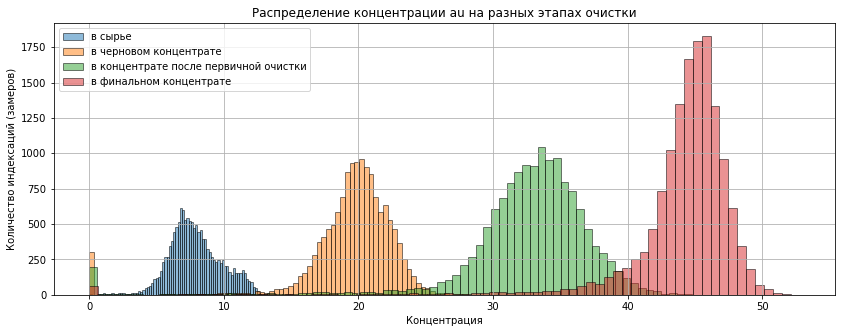

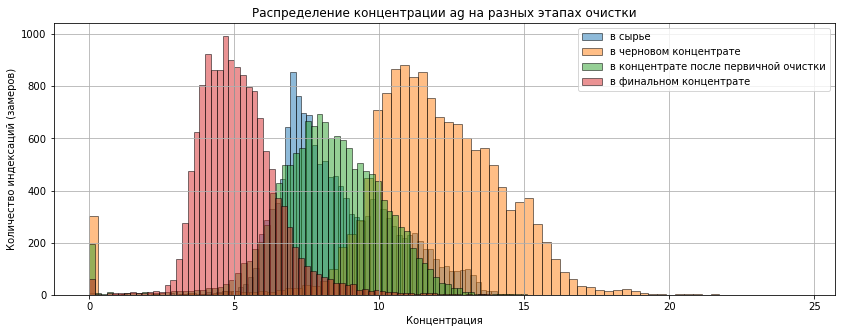

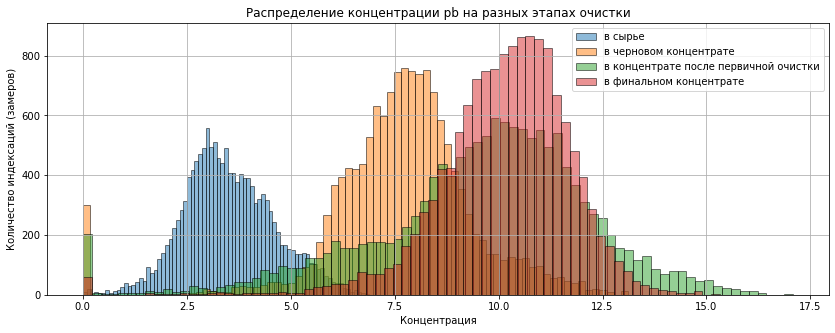

In [41]:
metals = ['au', 'ag', 'pb']
stages = [
    'rougher.input.feed_',
    'rougher.output.concentrate_',
    'primary_cleaner.output.concentrate_',
    'final.output.concentrate_',
]

print('\033[1m' + 'Максимальные значения концентраций металлов в сырье, '
      'в черновом концентрате, после первичной очистки и в '
      'финальном концентрате:' + '\033[0m')
print()
    
for metal in metals:
    max_concentration = 0
    plt.figure(figsize=(14, 5))
    plt.grid(True)
    plt.xlabel('Концентрация')
    plt.ylabel('Количество индексаций (замеров)')
    plt.title(f'Распределение концентрации {metal} на разных этапах очистки')
    for stage in stages:
        concentration = gold_train[f'{stage}{metal}']
        plt.hist(concentration, bins=80, alpha=0.5, edgecolor = 'black')
        plt.legend(['в сырье', 'в черновом концентрате', 
                    'в концентрате после первичной очистки', 
                    'в финальном концентрате'])
        max_concentraition = max(max_concentration, int(concentration.max()))
        print(f'{stage}{metal}:', max_concentraition)

Связанный с гистограммой тип графиков — график плотности, который формируется путем вычисления оценки непрерывного распределения вероятности, которое могло бы генерироваться наблюдаемыми данными. Обычная процедура заключается в аппроксимации этого распределение как смеси "ядер", то есть более простых распределений, таких как нормальное распределение. Таким образом, графики под графиками плотности также можно понимать графики оценки плотности ядра (*KDE*, *Kernel Density Estimate*).

**График оценки плотности ядра (KDE)** (*kdeplot*) позволяет нам оценивать функцию плотности вероятности непрерывной или непараметрической кривой из нашего набора данных в одном или нескольких измерениях. Это означает, что мы можем построить единый график для нескольких выборок, что помогает в более эффективной визуализации данных.

Плотность вероятности — один из способов задания распределения случайной величины. Во многих практических приложениях понятия "плотность вероятности" и "плотность (распределения) случайной величины" или "функция распределения вероятностей" фактически синонимизируются и под ними подразумевается вещественная функция, характеризующая сравнительную вероятность реализации тех или иных значений случайной переменной (переменных).

*Плотность вероятности*, или "*плотность (распределения) случайной величины*", - один из способов задания распределения случайной величины. Это - вещественная функция, характеризующая сравнительную вероятность реализации тех или иных значений случайной переменной (переменных). В нашем случае - значений концентрации в определённых признаках датасета (признаках).

Т.к. мы имеем дело с непрерывной величиной, для анализа её распределения мы можем построить график распределения плотности *kde* (`sns.kdeplot`) вместо обычной гистограммы.

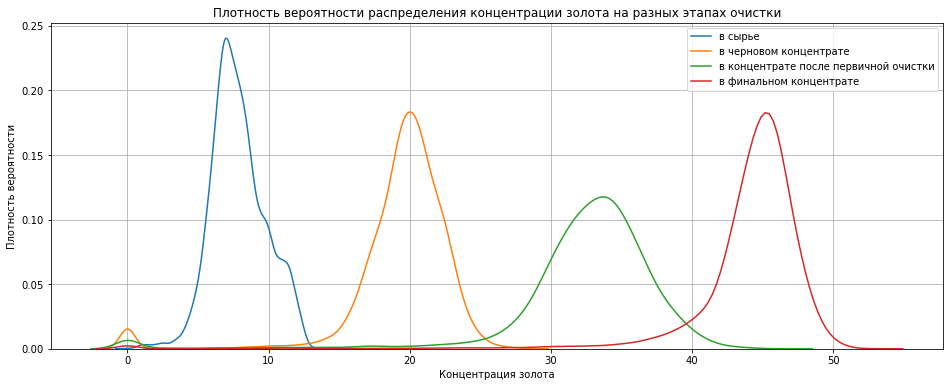

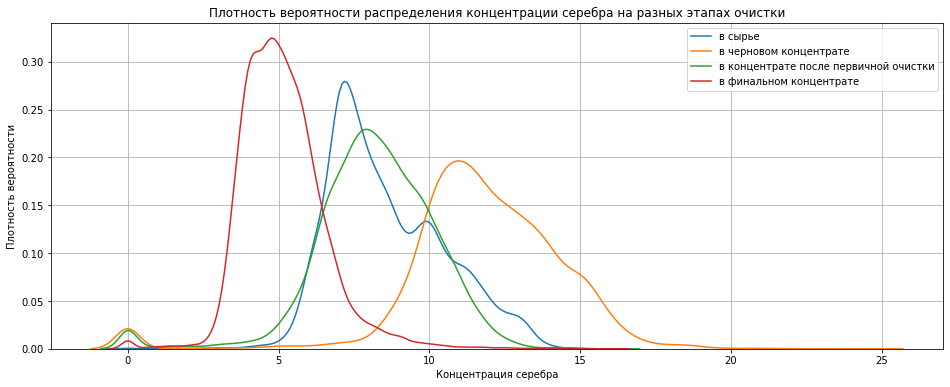

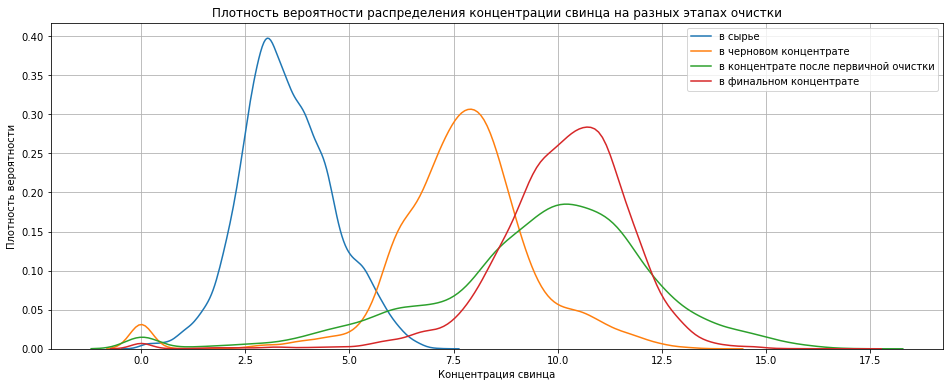

In [42]:
def concentrate_stages_metalls():

    for i,j in zip(('au','ag','pb'),
                   ('золота', 'серебра', 'свинца')):    

        plt.figure(figsize=(16,6))
        
        sns.kdeplot(x=gold_train['rougher.input.feed_' + i], 
                    label='в сырье')
        sns.kdeplot(x=gold_train['rougher.output.concentrate_' + i], 
                    label='в черновом концентрате')
        sns.kdeplot(x=gold_train['primary_cleaner.output.concentrate_' + i], 
                    label='в концентрате после первичной очистки')
        sns.kdeplot(x=gold_train['final.output.concentrate_' + i], 
                    label='в финальном концентрате')

        plt.legend()
        plt.grid()
        plt.title(f'Плотность вероятности распределения концентрации {j} '
                  'на разных этапах очистки')
        plt.xlabel(f'Концентрация {j}')
        plt.ylabel('Плотность вероятности')
        plt.show()
        
concentrate_stages_metalls()

Таблица средних значений изменений концентрации металлов `table_concentrate_metal` и визуализация распределения концентрации всех металлов на различных этапах очистки наглядно показывают, что средняя концентрация золота (`au`) и свинца (`pb`) возрастает после прохождения каждого этапа. Причём средняя концентрация золота в финале увеличивается более, чем в 5 раз. При этом, средняя концентрация серебра (`ag`), сначала повышается, а потом, наоборот, снижается и становится меньше исходной.

<a name="42"></a> <div style="text-align: right">[Cодержание](#Содержание)</div>
### Распределение размеров гранул сырья

Сравним распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

Параметр `feed size` — размер гранул сырья:
1. `rougher.input.feed_size` - размер гранул исходного сырья
2. `primary_cleaner.input.feed_size` - размер гранул при первичной очистке

Построим диаграммы размаха ("ящики с усами") по распределению размеров гранул сырья на обучающей и тестовой выборках.

Поясним особенности этой диаграммы.

"Ящик" ограничен первым и третьим квартилями (нижняя и верхняя стороны прямоугольника - границы ящика). Внутри ящика зелёной линией обозначена медиана (второй квартиль).
"Усы" простираются вниз и вверх от границ ящика (чёрные линии ниже и выше границ ящика) на расстояние, равное 1,5 межквартильного размаха (сокращённо *IQR*, от англ. *interquartile range*, "межквартильный размах"). В размах "усов" попадают нормальные значения, а за пределами находятся выбросы, изображённые точками. Если верхний "ус" длиннее максимума, то он заканчивается максимумом. То же — для минимума и нижнего "уса".

<a name="421"></a> <div style="text-align: right">[Cодержание](#Содержание)</div>
#### Гранулы исходного сырья

Построим диаграмму размаха ("ящик с усами") по распределению размеров гранул исходного сырья `rougher.input.feed_size` на обучающей выборке при помощи метода `.boxplot()`.

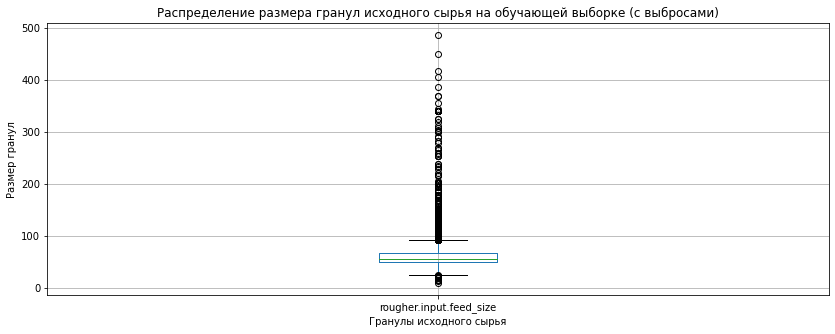

In [43]:
gold_train.boxplot(column='rougher.input.feed_size', figsize=(14, 5))
plt.xlabel('Гранулы исходного сырья')
plt.ylabel('Размер гранул')
plt.title(
    'Распределение размера гранул исходного сырья '
    'на обучающей выборке (с выбросами)')
plt.show()

Построим диаграмму размаха ("ящик с усами") по распределению размеров гранул исходного сырья `rougher.input.feed_size` на тестовой выборке при помощи метода `.boxplot`.

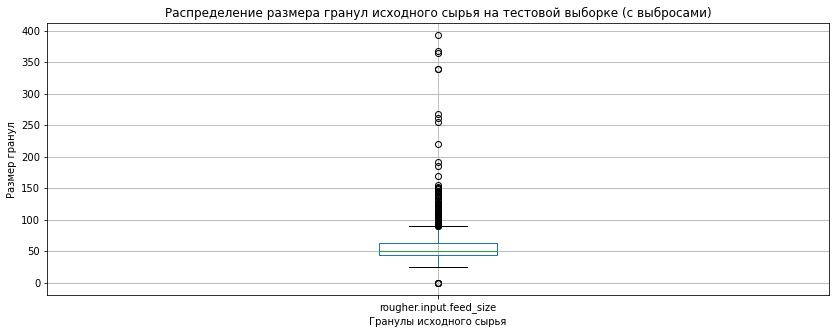

In [44]:
gold_test.boxplot(column='rougher.input.feed_size', figsize=(14, 5))
plt.xlabel('Гранулы исходного сырья')
plt.ylabel('Размер гранул')
plt.title(
    'Распределение размера гранул исходного сырья '
    'на тестовой выборке (с выбросами)')
plt.show()

Из-за выбросов сложно рассмотреть распределение внутри ящиков, поэтому сделаем второй график без выбросов, указав параметр `showfliers=False`.

Построим диаграмму размаха ("ящик с усами") по распределению размеров гранул исходного сырья `rougher.input.feed_size` без выбросов на обучающей выборке.

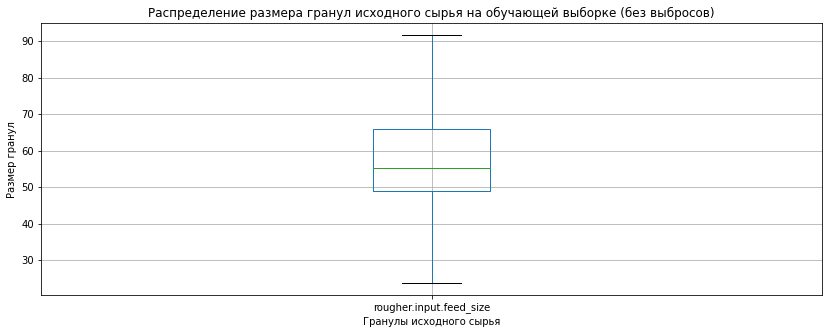

In [45]:
gold_train.boxplot(column='rougher.input.feed_size', 
                   showfliers=False, figsize=(14, 5))
plt.xlabel('Гранулы исходного сырья')
plt.ylabel('Размер гранул')
plt.title(
    'Распределение размера гранул исходного сырья '
    'на обучающей выборке (без выбросов)')
plt.show()

Построим диаграмму размаха ("ящик с усами") по распределению размеров гранул исходного сырья `rougher.input.feed_size` без выбросов на тестовой выборке.

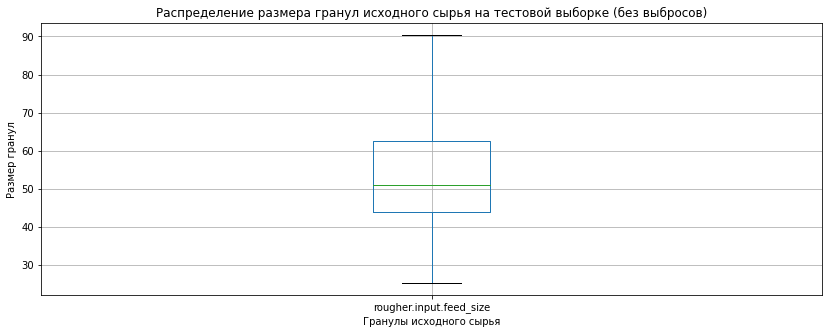

In [46]:
gold_test.boxplot(column='rougher.input.feed_size', 
                  showfliers=False, figsize=(14, 5))
plt.xlabel('Гранулы исходного сырья')
plt.ylabel('Размер гранул')
plt.title(
    'Распределение размера гранул исходного сырья '
    'на тестовой выборке (без выбросов)')
plt.show()

Отдельно визуализируем распределение размера гранул исходного сырья `rougher.input.feed_size` на обучающей и тестовой выборках одновременно при помощи библиотеки `matplotlib.pyplot`.

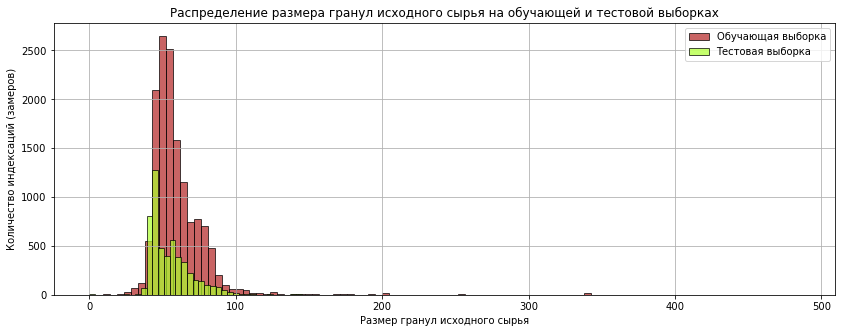

In [47]:
gold_train['rougher.input.feed_size']\
.hist(figsize=(14, 5), bins=100, alpha=0.7, 
      color='firebrick', edgecolor = 'black')

gold_test['rougher.input.feed_size']\
.hist(figsize=(14, 5), bins=100, alpha=0.7, 
      color='greenyellow', edgecolor = 'black')

plt.grid(True)
plt.legend(['Обучающая выборка', 
            'Тестовая выборка'])
plt.xlabel('Размер гранул исходного сырья')
plt.ylabel('Количество индексаций (замеров)')
plt.title('Распределение размера гранул исходного сырья '
          'на обучающей и тестовой выборках')
plt.show()

<a name="422"></a> <div style="text-align: right">[Cодержание](#Содержание)</div>
#### Гранулы при первичной очистке

Построим диаграмму размаха ("ящик с усами") по распределению размеров гранул при первичной очистке `primary_cleaner.input.feed_size` на обучающей выборке при помощи метода `.boxplot()`.

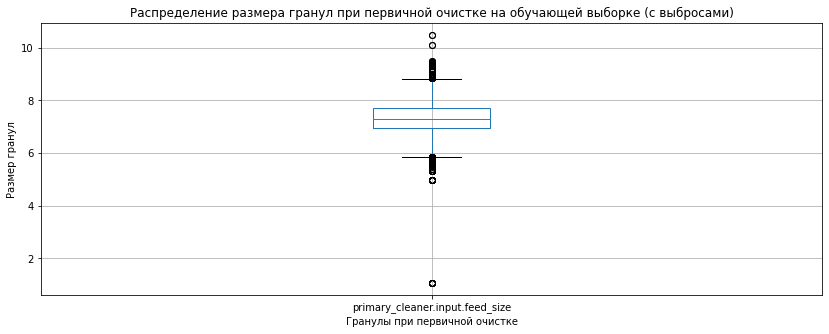

In [48]:
gold_train.boxplot(column='primary_cleaner.input.feed_size', figsize=(14, 5))
plt.xlabel('Гранулы при первичной очистке')
plt.ylabel('Размер гранул')
plt.title(
    'Распределение размера гранул при первичной очистке '
    'на обучающей выборке (с выбросами)')
plt.show()

Построим диаграмму размаха ("ящик с усами") по распределению размеров гранул при первичной очистке `primary_cleaner.input.feed_size` на тестовой выборке при помощи метода `.boxplot()`.

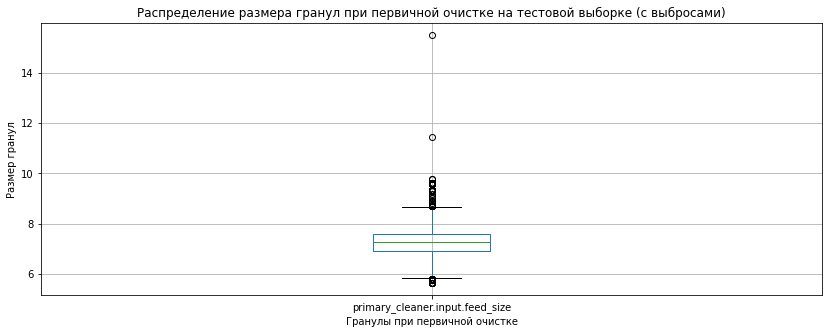

In [49]:
gold_test.boxplot(column='primary_cleaner.input.feed_size', figsize=(14, 5))
plt.xlabel('Гранулы при первичной очистке')
plt.ylabel('Размер гранул')
plt.title(
    'Распределение размера гранул при первичной очистке '
    'на тестовой выборке (с выбросами)')
plt.show()

Диаграмма размаха ("ящик с усами") по распределению размеров гранул при первичной очистке `primary_cleaner.input.feed_size` без выбросов на обучающей выборке.

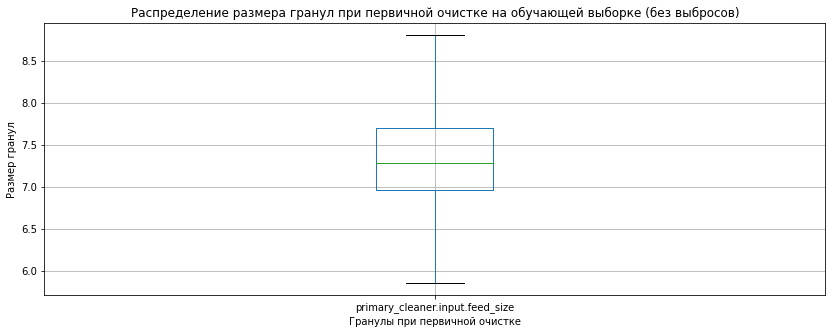

In [50]:
gold_train.boxplot(column='primary_cleaner.input.feed_size', 
                   showfliers=False, figsize=(14, 5))
plt.xlabel('Гранулы при первичной очистке')
plt.ylabel('Размер гранул')
plt.title(
    'Распределение размера гранул при первичной очистке '
    'на обучающей выборке (без выбросов)')
plt.show()

Диаграмма размаха ("ящик с усами") по распределению размеров гранул при первичной очистке `primary_cleaner.input.feed_size` без выбросов на тестовой выборке.

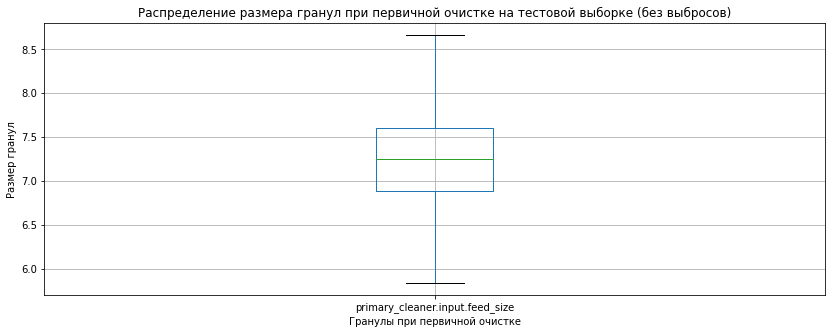

In [51]:
gold_test.boxplot(column='primary_cleaner.input.feed_size', 
                  showfliers=False, figsize=(14, 5))
plt.xlabel('Гранулы при первичной очистке')
plt.ylabel('Размер гранул')
plt.title(
    'Распределение размера гранул при первичной очистке '
    'на тестовой выборке (без выбросов)')
plt.show()

Отдельно визуализируем распределение размера гранул при первичной очистке `primary_cleaner.input.feed_size` на обучающей и тестовой выборках одновременно при помощи библиотеки `matplotlib.pyplot`.

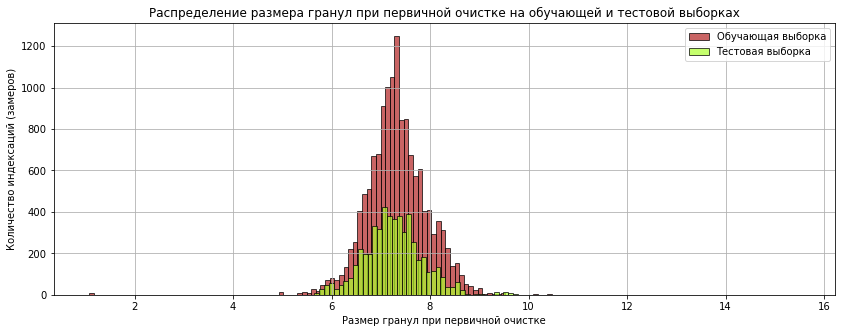

In [52]:
gold_train['primary_cleaner.input.feed_size']\
.hist(figsize=(14, 5), bins=100, alpha=0.7, 
      color='firebrick', edgecolor = 'black')

gold_test['primary_cleaner.input.feed_size']\
.hist(figsize=(14, 5), bins=100, alpha=0.7, 
      color='greenyellow', edgecolor = 'black')

plt.grid(True)
plt.legend(['Обучающая выборка', 
            'Тестовая выборка'])
plt.xlabel('Размер гранул при первичной очистке')
plt.ylabel('Количество индексаций (замеров)')
plt.title('Распределение размера гранул при первичной очистке '
          'на обучающей и тестовой выборках')
plt.show()

Т.к. мы имеем дело с непрерывной величиной - для анализа её распределения используем график распределения плотности *kde* (`sns.kdeplot`) вместо обычной гистограммы.

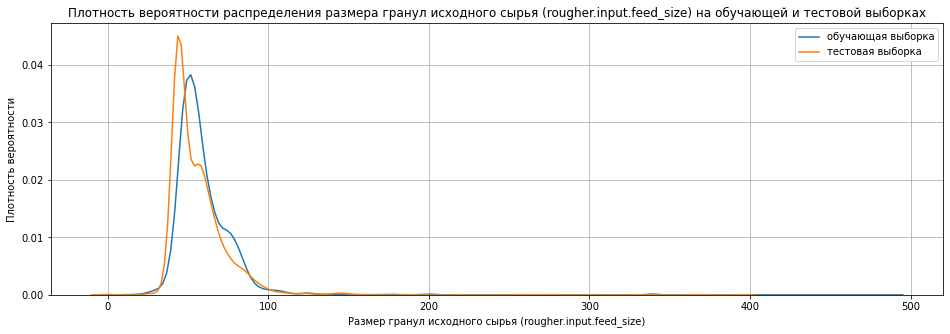

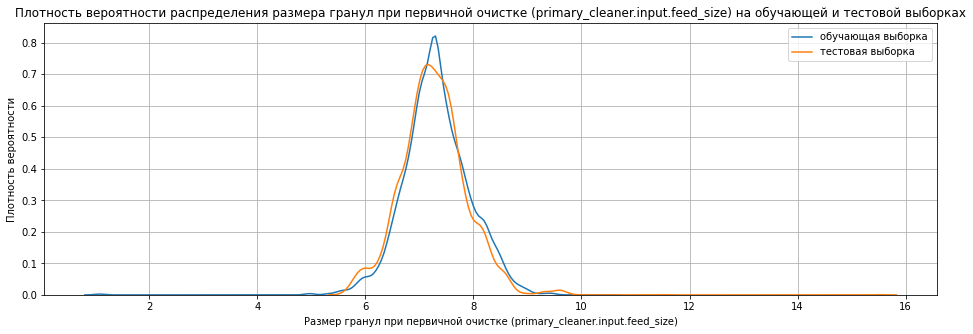

In [53]:
for i,j in zip(('rougher.input.feed_size','primary_cleaner.input.feed_size'),
               ('исходного сырья','при первичной очистке')): 
    
    plt.figure(figsize=(16,5))

    sns.kdeplot(x=gold_train[i], label='обучающая выборка')
    sns.kdeplot(x=gold_test[i], label='тестовая выборка')

    plt.legend()
    plt.grid()
    plt.xlabel('Размер гранул ' + j + ' (' + i + ')')
    plt.ylabel('Плотность вероятности')
    plt.title('Плотность вероятности распределения размера '
              'гранул ' + j + ' (' + i + ') на обучающей и тестовой выборках');

Распределения размеров гранул сырья (медианы, "хвосты") на обучающей и тестовой выборках не сильно отличаются друг от друга. Отличается только количество замеров (видно на гистограммах).

<a name="423"></a> <div style="text-align: right">[Cодержание](#Содержание)</div>
#### Вывод по п. 4.2

В подразделе [**Распределение размеров гранул сырья**](#Распределение-размеров-гранул-сырья) изучены данные о гранулах исходного сырья и гранулах при первичной очистке.


В результате выполнения задач этого подраздела было выявлено следующее:
1. На диаграммах размаха по распределению размеров гранул исходного сырья `rougher.input.feed_size` на обучающей и тестовой выборках видны большие выбросы в верхней области. Распределение размеров гранул исходного сырья имеет положительную асимметрию (смещено вправо). 
2. На диаграммах размаха по распределению размеров гранул при первичной очистке `primary_cleaner.input.feed_size` на обучающей и тестовой выборках количество выбросов значительно уменьшилось и стало равнозначным по обеим сторонам от границ ящика (первого и третьего квартилей). Распределение размера гранул при первичной очистке стало иметь вид нормального распределения.
3. Размер гранул при первичной очистке (~ 7,3) значительно уменьшился по сравнению с исходным сырьём (50 $\div$ 55). 
4. Распределения размеров гранул сырья на обучающей и тестовой выборках для каждого этапа не сильно отличаются друг от друга, а значит оценка модели будет правильной.

<a name="43"></a> <div style="text-align: right">[Cодержание](#Содержание)</div>
### Суммарная концентрация всех веществ на разных стадиях

Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

In [54]:
# в сырье
gold_train[rougher_input_feed].sum(1).head()

date
2016-01-15 00:00:00    51.680034
2016-01-15 01:00:00    50.659114
2016-01-15 02:00:00    50.609929
2016-01-15 03:00:00    51.061546
2016-01-15 04:00:00    47.859163
dtype: float64

In [55]:
# в черновом концентрате
gold_train[rougher_output_concentrate].sum(1).head()

date
2016-01-15 00:00:00    66.424950
2016-01-15 01:00:00    67.012710
2016-01-15 02:00:00    66.103793
2016-01-15 03:00:00    65.752751
2016-01-15 04:00:00    65.908382
dtype: float64

In [56]:
# в финальном концентрате
gold_train[final_output_concentrate].sum(1).head()

date
2016-01-15 00:00:00    63.644396
2016-01-15 01:00:00    63.957723
2016-01-15 02:00:00    64.311180
2016-01-15 03:00:00    63.573449
2016-01-15 04:00:00    64.004667
dtype: float64

Построим гистограммы для распределения суммарной концентрации всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах в обучающей выборке `gold_recovery_train_new`.

Максимальные значения суммарной концентрации всех металлов в сырье, в черновом концентрате, после первичной очистки и в финальном концентрате:

['rougher.input.feed_au', 'rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_sol']: 74
['rougher.output.concentrate_au', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol']: 88
['primary_cleaner.output.concentrate_au', 'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol']: 76
['final.output.concentrate_au', 'final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol']: 80


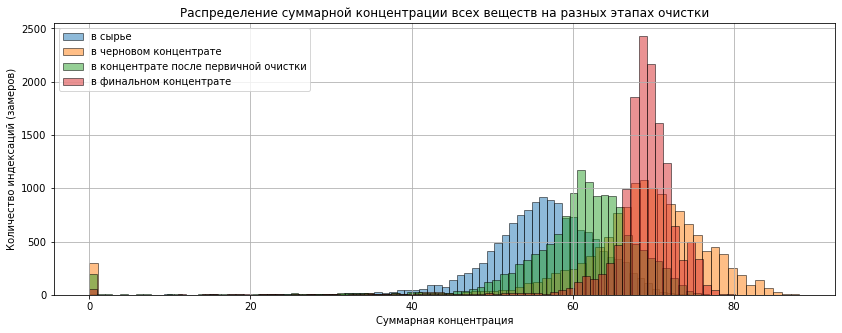

In [57]:
stages = [
    rougher_input_feed,
    rougher_output_concentrate,
    primary_cleaner_output_concentrate,
    final_output_concentrate,
]

print('\033[1m' + 'Максимальные значения суммарной концентрации всех металлов '
      'в сырье, в черновом концентрате, после первичной очистки '
      'и в финальном концентрате:' + '\033[0m')
print()
    
max_concentration = 0
plt.figure(figsize=(14, 5))
plt.grid(True)
plt.xlabel('Суммарная концентрация')
plt.ylabel('Количество индексаций (замеров)')
plt.title('Распределение суммарной концентрации всех веществ '
          'на разных этапах очистки')
for stage in stages:
    concentration = gold_train[stage].sum(1)
    plt.hist(concentration, bins=80, alpha=0.5, edgecolor = 'black')
    plt.legend(['в сырье', 'в черновом концентрате', 
                'в концентрате после первичной очистки', 'в финальном концентрате'])
    max_concentraition = max(max_concentration, int(concentration.max()))
    print(f'{stage}:', max_concentraition)

Т.к. мы имеем дело с непрерывной величиной, для анализа её распределения мы можем построить график распределения плотности *kde* (`sns.kdeplot`) вместо обычной гистограммы.

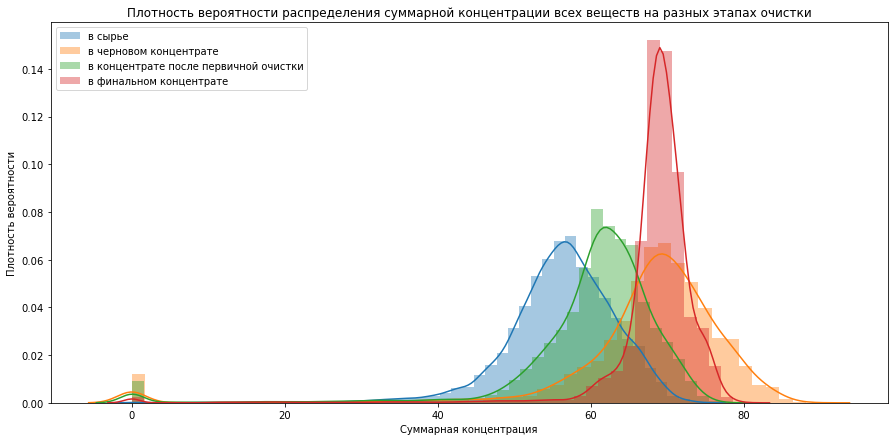

In [58]:
def concentrate_metalls_all_stages():

    plt.figure(figsize=(15,7))

    for i,j in zip(('rougher.input.feed_', 
                    'rougher.output.concentrate_', 
                    'primary_cleaner.output.concentrate_', 
                    'final.output.concentrate_'),
                   
                    ('в сырье',
                     'в черновом концентрате',
                     'в концентрате после первичной очистки',
                     'в финальном концентрате')):

        sns.distplot(gold_train[[i + 'au', i + 'ag', i + 'pb', i + 'sol']]\
                     .sum(axis=1), label=j)

        plt.grid()
        plt.legend()
        plt.xlabel('Суммарная концентрация')
        plt.ylabel('Плотность вероятности')
        plt.title('Плотность вероятности распределения cуммарной концентрации '
                  'всех веществ на разных этапах очистки')
        
concentrate_metalls_all_stages()

Таблица средних значений изменений концентрации металлов `table_concentrate_metal` и визуализация в виде гистограмм показывает, что суммарная концентрация всех металлов увеличивается с каждым этапом очистки, в основном, засчёт увеличения концентрации золота (`au`).

При этом в распределении присутствуют аномальные значения концентраций, равные у нулю (пик слева). Удалим их, т.к. удаление выбросов улучшит работу модели.

In [59]:
gold_train.shape

(14149, 87)

Используем *list comprehension*.

In [60]:
columns_to_change = \
[column for column in gold_train.columns if 'concentrate' in column]

for col in columns_to_change:
    gold_train = gold_train[gold_train[col] > 0]
gold_train.shape

(13705, 87)

Проверим распределения ещё раз.

Максимальные значения суммарной концентрации всех металлов в сырье, в черновом концентрате, после первичной очистки и в финальном концентрате:

['rougher.input.feed_au', 'rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_sol']: 74
['rougher.output.concentrate_au', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol']: 88
['primary_cleaner.output.concentrate_au', 'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol']: 76
['final.output.concentrate_au', 'final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol']: 80


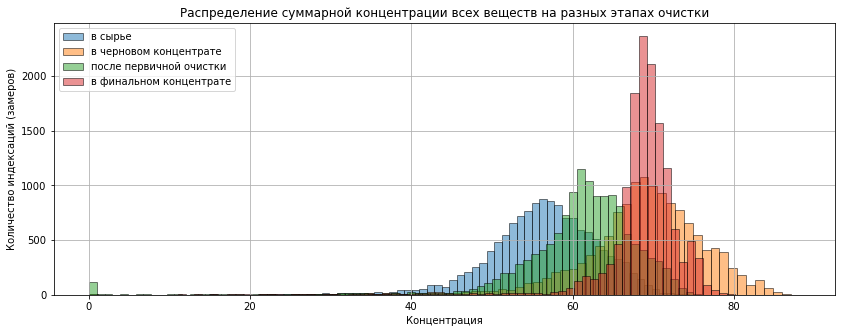

In [61]:
stages = [
    rougher_input_feed,
    rougher_output_concentrate,
    primary_cleaner_output_concentrate,
    final_output_concentrate,
]

print('\033[1m' + 'Максимальные значения суммарной концентрации всех металлов '
      'в сырье, в черновом концентрате, после первичной очистки '
      'и в финальном концентрате:' + '\033[0m')
print()
    
max_concentration = 0
plt.figure(figsize=(14, 5))
plt.grid(True)
plt.xlabel('Концентрация')
plt.ylabel('Количество индексаций (замеров)')
plt.title('Распределение суммарной концентрации всех веществ '
          'на разных этапах очистки')
for stage in stages:
    concentration = gold_train[stage].sum(1)
    plt.hist(concentration, bins=80, alpha=0.5, edgecolor = 'black')
    plt.legend(['в сырье', 'в черновом концентрате', 
                'после первичной очистки', 'в финальном концентрате'])
    max_concentraition = max(max_concentration, int(concentration.max()))
    print(f'{stage}:', max_concentraition)

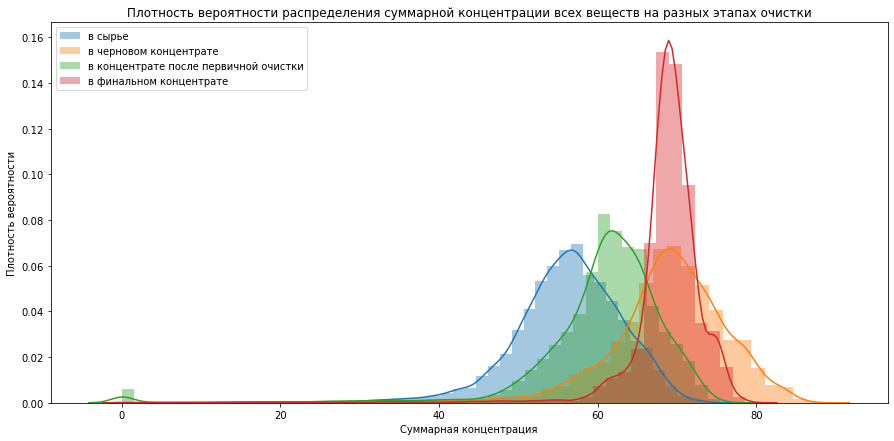

In [62]:
for i in ('rougher.input.feed_', 
          'rougher.output.concentrate_',
          'primary_cleaner.output.concentrate_',
          'final.output.concentrate_'):
    
    for j in ('au', 'ag', 'pb', 'sol'):
        df_train = gold_train[gold_train[i+j] >= 1]
    
concentrate_metalls_all_stages()

Пик слева исчез. Итак, данные оптимизированны.

<a name="44"></a> <div style="text-align: right">[Cодержание](#Содержание)</div>
### Вывод

В разделе [**Анализ данных**](#Анализ-данных) были выполнены следующие задачи:
1. Мы посмотрели, как меняется концентрация металлов (*Au*, *Ag*, *Pb*) на различных этапах очистки;
2. Сравнили распределения размеров гранул сырья на обучающей и тестовой выборках. Увидели, что распределения мало отличаются друг от друга, а значит оценка модели будет правильной;
3. Исследовали суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.


В результате выполнения задач этого раздела было выявлено следующее:
1. Таблица средних значений изменений концентрации металлов `table_concentrate_metal` и визуализация распределения концентрации всех металлов на различных этапах очистки наглядно показывают, что средняя концентрация золота (`au`) и свинца (`pb`) возрастает после прохождения каждого этапа. Причём средняя концентрация золота в финале увеличивается более, чем в 5 раз. При этом, средняя концентрация серебра (`ag`), сначала повышается, а потом, наоборот, снижается и становится меньше исходной.
2. На диаграммах размаха по распределению размеров гранул исходного сырья `rougher.input.feed_size` на обучающей и тестовой выборках видны большие выбросы в верхней области. Распределение размеров гранул исходного сырья имеет положительную асимметрию (смещено вправо). 
3. На диаграммах размаха по распределению размеров гранул при первичной очистке `primary_cleaner.input.feed_size` на обучающей и тестовой выборках количество выбросов значительно уменьшилось и стало равнозначным по обеим сторонам от границ ящика (первого и третьего квартилей). Распределение размера гранул при первичной очистке стало иметь вид нормального распределения.
4. Размер гранул при первичной очистке (~ 7,3) значительно уменьшился по сравнению с исходным сырьём (50 $\div$ 55). 
5. Распределения размеров гранул сырья на обучающей и тестовой выборках для каждого этапа не сильно отличаются друг от друга, а значит оценка модели будет правильной.
6. Таблица средних значений изменений концентрации металлов `table_concentrate_metal` и визуализация распределения суммарной концентрации всех веществ на разных этапах очистки показывает, что суммарная концентрация увеличивается на каждом этапе очистки, в основном, засчёт увеличения концентрации золота (`au`). При этом в распределении присутствуют аномальные значения концентраций, равные у нулю (пик слева), которые мы удалили для улучшения работы модели.

<a name="5"></a> <div style="text-align: right">[Cодержание](#Содержание)</div>
## Обучение моделей

Обучим разные модели и оценим их качество кросс-валидацией.

<a name="51"></a> <div style="text-align: right">[Cодержание](#Содержание)</div>
### Функция для вычисления *final_sMAPE*

Напомним:

Итоговая метрика *final_sMAPE* складывается из двух величин:

$$
final\_sMAPE = 25\% \times sMAPE(rougher) + 75\% \times sMAPE(final)
$$

In [63]:
def smape_function(y_true, y_pred):
    error = np.abs(y_true - y_pred)
    scale = (np.abs(y_true) + np.abs(y_pred)) / 2
    return np.mean(error / scale) * 100

In [64]:
def final_smape_function(rougher, final):
    score_final = 0.25 * rougher + 0.75 * final
    return score_final

Создадим собственную метрику оценки качества модели *sMAPE* с помощью функции `make_scorer()`. Здесь параметр `smape_function` - это функция для расчета *sMAPE*. Параметр `greater_is_better=False` означает - чем меньше значение метрики *sMAPE*, тем лучше модель. Этот параметр будет возвращать отрицательное значение, которое можно будет потом умножить на -1.

In [65]:
smape_scorer = make_scorer(smape_function, greater_is_better=False)

<a name="52"></a> <div style="text-align: right">[Cодержание](#Содержание)</div>
### Разделение обучающей выборки на признаки и таргет

Разделим обучающую выборку `gold_recovery_train_new` на признаки `features_train` и таргет `target_train`.

В переменной `features_train` сохраним только те признаки из обучающей выборки, которые присутствуют одновременно и в обучающей, и в тестовой выборках (т.е. без таргетов) и сбросим индекс.

In [66]:
features_train = gold_train[features].reset_index(drop=True)

Выделим из обучающего датасета `gold_train` таргет `target_train` с целевыми признаками `rougher.output.recovery` и `final.output.recovery` и сбросим индекс.

In [67]:
target_train = gold_train[targets].reset_index(drop=True)

Признаки в обучающей выборке `gold_recovery_train_new`.

In [68]:
features_train.head()

primary_cleaner.input.sulfate  primary_cleaner.input.depressant  \
0                     127.092003                         10.128295   
1                     125.629232                         10.296251   
2                     123.819808                         11.316280   
3                     122.270188                         11.322140   
4                     117.988169                         11.913613   

   primary_cleaner.input.feed_size  primary_cleaner.input.xanthate  \
0                             7.25                        0.988759   
1                             7.25                        1.002663   
2                             7.25                        0.991265   
3                             7.25                        0.996739   
4                             7.25                        1.009869   

   primary_cleaner.state.floatbank8_a_air  \
0                             1549.775757   
1                             1576.166671   
2                             1601.556163   
3                             1599.968720   
4                             1601.339707   

   primary_cleaner.state.floatbank8_a_level  \
0                               -498.912140   
1                               -500.904965   
2                               -499.997791   
3                               -500.951778   
4                               -498.975456   

   primary_cleaner.state.floatbank8_b_air  \
0                             1551.434204   
1                             1575.950626   
2                             1600.386685   
3                             1600.659236   
4                             1601.437854   

   primary_cleaner.state.floatbank8_b_level  \
0                               -516.403442   
1                               -499.865889   
2                               -500.607762   
3                               -499.677094   
4                               -500.323246   

   primary_cleaner.state.floatbank8_c_air  \
0                             1549.873901   
1                             1575.994189   
2                             1602.003542   
3                             1600.304144   
4                             1599.581894   

   primary_cleaner.state.floatbank8_c_level  \
0                               -498.666595   
1                               -499.315107   
2                               -500.870069   
3                               -500.727997   
4                               -500.888152   

   primary_cleaner.state.floatbank8_d_air  \
0                             1554.367432   
1                             1574.479259   
2                             1599.541515   
3                             1600.449520   
4                             1602.649541   

   primary_cleaner.state.floatbank8_d_level  rougher.input.feed_ag  \
0                               -493.428131               6.100378   
1                               -498.931665               6.161113   
2                               -499.827444               6.116455   
3                               -500.052575               6.043309   
4                               -500.593010               6.060915   

   rougher.input.feed_pb  rougher.input.feed_rate  rougher.input.feed_size  \
0               2.284912               523.546326                55.486599   
1               2.266033               525.290581                57.278666   
2               2.159622               530.026610                57.510649   
3               2.037807               542.590390                57.792734   
4               1.786875               540.531893                56.047189   

   rougher.input.feed_sol  rougher.input.feed_au  \
0               36.808594               6.486150   
1               35.753385               6.478583   
2               35.971630               6.362222   
3               36.862241               6.118189   
4               34.347666               5.663707   

   rougher.input.floatban

Для наглядности, выведем по отдельности целевые признаки `rougher.output.recovery` (индекс "0") и `final.output.recovery` (индекс "1") в обучающей выборке `gold_recovery_train_new`.

In [69]:
display(target_train.head())
display(target_train.iloc[:, 0].head())
display(target_train.iloc[:, 1].head())

rougher.output.recovery  final.output.recovery
0                87.107763              70.541216
1                86.843261              69.266198
2                86.842308              68.116445
3                87.226430              68.347543
4                86.688794              66.927016

0    87.107763
1    86.843261
2    86.842308
3    87.226430
4    86.688794
Name: rougher.output.recovery, dtype: float64

0    70.541216
1    69.266198
2    68.116445
3    68.347543
4    66.927016
Name: final.output.recovery, dtype: float64

<a name="53"></a> <div style="text-align: right">[Cодержание](#Содержание)</div>
### `DecisionTreeRegressor` + `GridSearchCV`

Построим модель **дерева решений *Decision Tree*** с **`GridSearchCV`** для задачи регрессии.

<a name="531"></a> <div style="text-align: right">[Cодержание](#Содержание)</div>
#### Черновой концентрат

В качестве целевого используем признак `rougher.output.recovery` - эффективность обогащения **чернового концентрата**.

Для получения лучшей модели **дерева решений** можно использовать кросс-валидацию и автоматический подбор гиперпараметров с помощью функции `GridSearchCV`. Функция `GridSearchCV` самостоятельно делит выборку на обучающую и валидационную. В параметрах `GridSearchCV` указываем:
- саму модель;
- гиперпараметры (`parameters`);
- в `scoring` указываем метрику *sMAPE*, которую нам необходимо рассчитать, - `smape_scorer`;
- кроссвалидацию `cv=3`;
- параметр `n_jobs=-1`, чтобы в ходе вычислений были задействованы все доступные ядра процессора;
- когда итераций много, и на каждой информация выводиться не должна, применяют аргумент `verbose` (англ. «подробный»).

In [70]:
%%time


# построим модель дерева решений
model_dt_grid_rougher = DecisionTreeRegressor(random_state=RANDOM_STATE)

# отдельно создадим словарь с гиперпараметром max_depth
parameters = {'max_depth': range (2, 10, 1)} 

# подберём гиперпараметры модели с помощью GridSearchCV
smape_score_dt_grid_rougher = GridSearchCV(model_dt_grid_rougher, 
                                           parameters, 
                                           scoring=smape_scorer, 
                                           cv=3, 
                                           n_jobs=-1, 
                                           verbose=3)

# обучим модель для целевого признака 'rougher.output.recovery'
# (индекс "0" у переменной target_train)
smape_score_dt_grid_rougher.fit(features_train, target_train.iloc[:, 0])


print('Best model DT+GridSearchCV для таргета "rougher":', 
      smape_score_dt_grid_rougher.best_estimator_)
print('Best params DT+GridSearchCV для таргета "rougher":', 
      smape_score_dt_grid_rougher.best_params_)
print('Best sMAPE DT+GridSearchCV для таргета "rougher":', 
      f'{abs(smape_score_dt_grid_rougher.best_score_):.2f}%')

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best model DT+GridSearchCV для таргета "rougher": DecisionTreeRegressor(max_depth=4, random_state=12345)
Best params DT+GridSearchCV для таргета "rougher": {'max_depth': 4}
Best sMAPE DT+GridSearchCV для таргета "rougher": 7.80%
CPU times: total: 375 ms
Wall time: 6.13 s


Лучшая модель дерева решений **`DecisionTreeRegressor`** с `GridSearchCV` для таргета `rougher.output.recovery` (эффективность обогащения **чернового концентрата**) имеет значение метрики оценки качества:
- ***sMAPE = 7.80%*** 

при следующих параметрах:
- глубина дерева: `max_depth` = 4.

<a name="532"></a> <div style="text-align: right">[Cодержание](#Содержание)</div>
#### Финальный концентрат

В качестве целевого используем признак `final.output.recovery` - эффективность обогащения **финального концентрата**.

In [71]:
%%time


# построим модель дерева решений
model_dt_grid_final = DecisionTreeRegressor(random_state=RANDOM_STATE)

# отдельно создадим словарь с гиперпараметром max_depth
parameters = {'max_depth': range (2, 10, 1)} 

# подберём гиперпараметры модели с помощью GridSearchCV
smape_score_dt_grid_final = GridSearchCV(model_dt_grid_final, 
                                         parameters, 
                                         scoring=smape_scorer, 
                                         cv=3, 
                                         n_jobs=-1, 
                                         verbose=3)

# обучим модель для целевого признака 'final.output.recovery'
# (индекс "1" у переменной target_train)
smape_score_dt_grid_final.fit(features_train, target_train.iloc[:, 1])


print('Best model DT+GridSearchCV для таргета "final":', 
      smape_score_dt_grid_final.best_estimator_)
print('Best params DT+GridSearchCV для таргета "final":', 
      smape_score_dt_grid_final.best_params_)
print('Best sMAPE DT+GridSearchCV для таргета "final":', 
      f'{abs(smape_score_dt_grid_final.best_score_):.2f}%')

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best model DT+GridSearchCV для таргета "final": DecisionTreeRegressor(max_depth=2, random_state=12345)
Best params DT+GridSearchCV для таргета "final": {'max_depth': 2}
Best sMAPE DT+GridSearchCV для таргета "final": 9.85%
CPU times: total: 203 ms
Wall time: 928 ms


Лучшая модель дерева решений **`DecisionTreeRegressor`** с `GridSearchCV` для таргета `final.output.recovery` (эффективность обогащения **финального концентрата**) имеет значение метрики оценки качества:
- ***sMAPE = 9.85%*** 

при следующих параметрах:
- глубина дерева: `max_depth` = 2.

<a name="54"></a> <div style="text-align: right">[Cодержание](#Содержание)</div>
### `RandomForestRegressor` + `GridSearchCV`

Построим модель **случайного леса *Random Forest*** с **`GridSearchCV`** для задачи регрессии.

<a name="541"></a> <div style="text-align: right">[Cодержание](#Содержание)</div>
#### Черновой концентрат

В качестве целевого используем признак `rougher.output.recovery` - эффективность обогащения **чернового концентрата**.

In [72]:
%%time


# построим модель случайного леса
model_rf_grid_rougher = RandomForestRegressor(random_state=RANDOM_STATE)

# отдельно создадим словарь с гиперпараметрами n_estimators и max_depth
parameters = {'n_estimators': range (100, 201, 20),
              'max_depth': range (2, 10, 1)}  

# подберём гиперпараметры модели с помощью GridSearchCV
smape_score_rf_grid_rougher = GridSearchCV(model_rf_grid_rougher, 
                                           parameters, 
                                           scoring=smape_scorer, 
                                           cv=3, 
                                           n_jobs=-1, 
                                           verbose=3)

# обучим модель для целевого признака 'rougher.output.recovery'
# (индекс "0" у переменной target_train)
smape_score_rf_grid_rougher.fit(features_train, target_train.iloc[:, 0])


print('Best model RF+GridSearchCV для таргета "rougher":', 
      smape_score_rf_grid_rougher.best_estimator_)
print('Best params RF+GridSearchCV для таргета "rougher":', 
      smape_score_rf_grid_rougher.best_params_)
print('Best sMAPE RF+GridSearchCV для таргета "rougher":', 
      f'{abs(smape_score_rf_grid_rougher.best_score_):.2f}%')

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best model RF+GridSearchCV для таргета "rougher": RandomForestRegressor(max_depth=2, n_estimators=200, random_state=12345)
Best params RF+GridSearchCV для таргета "rougher": {'max_depth': 2, 'n_estimators': 200}
Best sMAPE RF+GridSearchCV для таргета "rougher": 7.83%
CPU times: total: 15.8 s
Wall time: 6min 2s


Лучшая модель случайного леса **`RandomForestRegressor`** с `GridSearchCV` для таргета `rougher.output.recovery` (эффективность обогащения **чернового концентрата**) имеет значение метрики оценки качества:
- ***sMAPE = 7.83%*** 

при следующих параметрах:
- глубина дерева: `max_depth` = 2
- количество деревьев: `n_estimators` = 200

<a name="542"></a> <div style="text-align: right">[Cодержание](#Содержание)</div>
#### Финальный концентрат

В качестве целевого используем признак `final.output.recovery` - эффективность обогащения **финального концентрата**.

In [73]:
%%time


# построим модель случайного леса
model_rf_grid_final = RandomForestRegressor(random_state=RANDOM_STATE)

# отдельно создадим словарь с гиперпараметрами n_estimators и max_depth
parameters = {'n_estimators': range (100, 201, 20),
              'max_depth': range (2, 10, 1)} 

# подберём гиперпараметры модели с помощью GridSearchCV
smape_score_rf_grid_final = GridSearchCV(model_rf_grid_final, 
                                         parameters, 
                                         scoring=smape_scorer, 
                                         cv=3, 
                                         n_jobs=-1, 
                                         verbose=3)

# обучим модель для целевого признака 'final.output.recovery'
# (индекс "1" у переменной target_train)
smape_score_rf_grid_final.fit(features_train, target_train.iloc[:, 1])


print('Best model RF+GridSearchCV для таргета "final":', 
      smape_score_rf_grid_final.best_estimator_)
print('Best params RF+GridSearchCV для таргета "final":', 
      smape_score_rf_grid_final.best_params_)
print('Best sMAPE RF+GridSearchCV для таргета "final":', 
      f'{abs(smape_score_rf_grid_final.best_score_):.2f}%')

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best model RF+GridSearchCV для таргета "final": RandomForestRegressor(max_depth=2, n_estimators=180, random_state=12345)
Best params RF+GridSearchCV для таргета "final": {'max_depth': 2, 'n_estimators': 180}
Best sMAPE RF+GridSearchCV для таргета "final": 10.04%
CPU times: total: 17.1 s
Wall time: 6min 49s


Лучшая модель случайного леса **`RandomForestRegressor`** с `GridSearchCV` для таргета `final.output.recovery` (эффективность обогащения **финального концентрата**) имеет значение метрики оценки качества:
- ***sMAPE = 10.04%*** 

при следующих параметрах:
- глубина дерева: `max_depth` = 2
- количество деревьев: `n_estimators` = 180

<a name="55"></a> <div style="text-align: right">[Cодержание](#Содержание)</div>
### `LinearRegression` + `cross_val_score`

Построим модель **линейной регрессии *Linear Regression*** с **`cross_val_score`**.

*Кросс-валидация* - это оценка качества модели на нескольких валидационных выборках (параметр `cv`). Мы получаем массив из таких оценок на `cv` частях. Необходимо оценивать модель по среднему значению этих оценок, поэтому мы берём среднее значение `.mean()` от полученного массива `smape_scores`.

Функция `cross_val_score` в ходе перекрёстной проверки обучает (строит) и оценивает поданную на вход необученную модель и выдаёт массив `smape_scores`. Это обучение нигде не сохраняется, как объект, поэтому мы не можем использовать его результат для прогноза (`predict`).

<a name="551"></a> <div style="text-align: right">[Cодержание](#Содержание)</div>
#### Черновой концентрат

В качестве целевого используем признак `rougher.output.recovery` - эффективность обогащения **чернового концентрата**.

In [74]:
%%time


model_lr_cross_rougher = LinearRegression()
smape_scores_lr_cross_rougher = cross_val_score(model_lr_cross_rougher, 
                                                features_train, 
                                                target_train.iloc[:, 0], 
                                                scoring = smape_scorer, 
                                                cv=5)

final_smape_scores_lr_cross_rougher = abs(smape_scores_lr_cross_rougher.mean())


print('Best sMAPE LR+cross_val_score для таргета "rougher":', 
      f'{final_smape_scores_lr_cross_rougher:.2f}%')

Best sMAPE LR+cross_val_score для таргета "rougher": 7.26%
CPU times: total: 906 ms
Wall time: 143 ms


Модель линейной регрессии **`LinearRegression`** с `cross_val_score` для таргета `rougher.output.recovery` (эффективность обогащения **чернового концентрата**) имеет значение метрики оценки качества:
- ***sMAPE = 7.26%***.

<a name="552"></a> <div style="text-align: right">[Cодержание](#Содержание)</div>
#### Финальный концентрат

В качестве целевого используем признак `final.output.recovery` - эффективность обогащения **финального концентрата**.

In [75]:
%%time


model_lr_cross_final = LinearRegression()
smape_scores_lr_cross_final = cross_val_score(model_lr_cross_final, 
                                              features_train, 
                                              target_train.iloc[:, 1], 
                                              scoring = smape_scorer, 
                                              cv=5)

final_smape_scores_lr_cross_final = abs(smape_scores_lr_cross_final.mean())


print('Best sMAPE LR+cross_val_score для таргета "final":', 
      f'{final_smape_scores_lr_cross_final:.2f}%')

Best sMAPE LR+cross_val_score для таргета "final": 10.91%
CPU times: total: 1 s
Wall time: 127 ms


Модель линейной регрессии **`LinearRegression`** с `cross_val_score` для таргета `final.output.recovery` (эффективность обогащения **финального концентрата**) имеет значение метрики оценки качества:
- ***sMAPE = 10.91%***.

<a name="56"></a> <div style="text-align: right">[Cодержание](#Содержание)</div>
### Сравнение моделей

Отобразим в таблице `table` метрику оценки качества ***sMAPE*** для всех моделей и двух таргетов `rougher.output.recovery` и `final.output.recovery`.

In [76]:
table = pd.DataFrame([
    ['DecisionTreeRegressor + GridSearchCV', 
     f'{abs(smape_score_dt_grid_rougher.best_score_):.2f}',
     f'{abs(smape_score_dt_grid_final.best_score_):.2f}'],
    ['RandomForestRegressor + GridSearchCV', 
     f'{abs(smape_score_rf_grid_rougher.best_score_):.2f}',
     f'{abs(smape_score_rf_grid_final.best_score_):.2f}'],
    ['LinearRegression + cross_val_score', 
     f'{final_smape_scores_lr_cross_rougher:.2f}', 
     f'{final_smape_scores_lr_cross_final:.2f}'],
],
columns=['model', 'sMAPE для чернового концентрата, %', 
         'sMAPE для финального концентрата, %'])


print('\033[1m' + 'Метрика оценки качества sMAPE для всех моделей '
      'и двух таргетов rougher и final' + '\033[0m')
table

Метрика оценки качества sMAPE для всех моделей и двух таргетов rougher и final


model sMAPE для чернового концентрата, %  \
0  DecisionTreeRegressor + GridSearchCV                               7.80   
1  RandomForestRegressor + GridSearchCV                               7.83   
2    LinearRegression + cross_val_score                               7.26   

  sMAPE для финального концентрата, %  
0                                9.85  
1                               10.04  
2                               10.91

Чем меньше значение метрики *sMAPE*, тем лучше модель. В полученных нами результатах значения *sMAPE* несильно различаются между собой.

Выберем в качестве лучшей модель **случайного леса `RandomForestRegressor`** с `GridSearchCV`, которая имеет следующие значения метрик оценки качества:
1. для таргета `rougher.output.recovery` (эффективность обогащения **чернового концентрата**):
    - ***sMAPE = 7.83%*** 

 при следующих параметрах:
    - глубина дерева: `max_depth` = 2
    - количество деревьев: `n_estimators` = 200
    

2. для таргета `final.output.recovery` (эффективность обогащения **финального концентрата**):
    - ***sMAPE = 10.04%*** 

 при следующих параметрах:
    - глубина дерева: `max_depth` = 2
    - количество деревьев: `n_estimators` = 180

<a name="57"></a> <div style="text-align: right">[Cодержание](#Содержание)</div>
### Вывод

В разделе [**Обучение моделей**](#Обучение-моделей) были выполнены следующие задачи:
1. Написана функция для вычисления итоговой метрики *final_sMAPE*;
2. Обучающая выборка разделена на признаки и таргет;
3. Обучено три модели `DecisionTreeRegressor`, `RandomForestRegressor` и `LinearRegression` с различными гиперпараметрами для двух целевых признаков:
    - `rougher.output.recovery` - эффективность обогащения чернового концентрата;
    - `final.output.recovery` - эффективность обогащения финального концентрата.
    
    
4. Построена общая таблица сравнения метрик.


В результате выполнения задач этого раздела в качестве лучшей выбрана модель случайного леса **`RandomForestRegressor`** с `GridSearchCV`, которая имеет следующие значения метрик оценки качества для двух целевых признаков:
1. для таргета `rougher.output.recovery` (эффективность обогащения **чернового концентрата**):
    - ***sMAPE = 7.83%*** 

 при следующих параметрах:
    - глубина дерева: `max_depth` = 2
    - количество деревьев: `n_estimators` = 200
    

2. для таргета `final.output.recovery` (эффективность обогащения **финального концентрата**):
    - ***sMAPE = 10.04%*** 

 при следующих параметрах:
    - глубина дерева: `max_depth` = 2
    - количество деревьев: `n_estimators` = 180

<a name="6"></a> <div style="text-align: right">[Cодержание](#Содержание)</div>
## Тестирование лучшей модели

Проверим лучшую модель **случайного леса** **`RandomForestRegressor`** на тестовой выборке.

<a name="61"></a> <div style="text-align: right">[Cодержание](#Содержание)</div>
### Качество модели

Напомним, что в подразделе [Предобработка данных](#Предобработка-данных) мы уже разделили тестовую выборку `gold_recovery_test_new` на признаки `features_test` и таргеты `target_test`:
- `features_test` - признаки в тестовой выборке `gold_recovery_test_new`;
- `target_test` - переменная с целевыми признаками `rougher.output.recovery` (индекс "0") и `final.output.recovery` (индекс "1") в тестовой выборке `gold_recovery_test_new`, соответственно.

<a name="611"></a> <div style="text-align: right">[Cодержание](#Содержание)</div>
#### Черновой концентрат

Проверим лучшую модель случайного леса **`RandomForestRegressor`** на тестовой выборке для целевого признака `rougher.output.recovery` (эффективность обогащения **чернового концентрата**).

In [77]:
# получим предсказания модели случайного леса на тестовой выборке
predictions_test_rougher = pd.Series(
    smape_score_rf_grid_rougher.predict(features_test))

# рассчитаем метрику качества sMAPE
smape_test_rougher = abs(smape_function(
    target_test.iloc[:, 0], predictions_test_rougher))


print('Best sMAPE RF для таргета "rougher" test:', 
      f'{smape_test_rougher:.2f}%')

Best sMAPE RF для таргета "rougher" test: 8.40%


Лучшая модель случайного леса **`RandomForestRegressor`** для таргета `rougher.output.recovery` (эффективность обогащения **чернового концентрата**) имеет значение метрики оценки качества:
- ***sMAPE = 8.40%***.

<a name="612"></a> <div style="text-align: right">[Cодержание](#Содержание)</div>
#### Финальный концентрат

Проверим лучшую модель случайного леса **`RandomForestRegressor`** на тестовой выборке для целевого признака `final.output.recovery` (эффективность обогащения **финального концентрата**).

In [78]:
# получим предсказания модели случайного леса на тестовой выборке
predictions_test_final = pd.Series(
    smape_score_rf_grid_final.predict(features_test))

# рассчитаем метрику качества sMAPE
smape_test_final = abs(smape_function(
    target_test.iloc[:, 1], predictions_test_final))


print('Best sMAPE RF для таргета "final" test:', 
      f'{smape_test_final:.2f}%')

Best sMAPE RF для таргета "final" test: 9.28%


Лучшая модель **случайного леса** **`RandomForestRegressor`** для таргета `final.output.recovery` (эффективность обогащения **финального концентрата**) имеет значение метрики оценки качества:
- ***sMAPE = 9.28%***.

<a name="62"></a> <div style="text-align: right">[Cодержание](#Содержание)</div>
### Итоговая метрика *final_sMAPE*

Рассчитаем итоговую метрику оценки качества модели ***final_sMAPE*** **на тестовой выборке**.

In [79]:
final_smape = abs(final_smape_function(smape_test_rougher, smape_test_final))

print('Final_sMAPE RF:', 
      f'{final_smape:.2f}%')

Final_sMAPE RF: 9.06%


Значение итоговой метрики оценки качества модели случайного леса **`RandomForestRegressor`**: 
- ***final_sMAPE = 9.06%***.

<a name="63"></a> <div style="text-align: right">[Cодержание](#Содержание)</div>
### `DummyRegressor`

Проверим лучшую модель на адекватность **на тестовой выборке**.

<a name="631"></a> <div style="text-align: right">[Cодержание](#Содержание)</div>
#### Черновой концентрат

Проверим лучшую модель на адекватность для целевого признака `rougher.output.recovery` (эффективность обогащения **чернового концентрата**).

In [80]:
model_dummy_rougher = DummyRegressor(strategy='median')
model_dummy_rougher.fit(features_train, target_train.iloc[:, 0]) 
predictions_dummy_rougher = pd.Series(
    model_dummy_rougher.predict(features_test))
smape_dummy_rougher = abs(smape_function(
    target_test.iloc[:, 0], predictions_dummy_rougher))


print('Наивный прогноз sMAPE для таргета "rougher":', 
      f'{smape_dummy_rougher:.2f}%')

Наивный прогноз sMAPE для таргета "rougher": 8.52%


Наивный прогноз метрики оценки качества константной модели **`DummyRegressor`** для таргета `rougher.output.recovery` (эффективности обогащения **чернового концентрата**) имеет значение:
- ***sMAPE = 8.52%***.

<a name="632"></a> <div style="text-align: right">[Cодержание](#Содержание)</div>
#### Финальный концентрат

Проверим лучшую модель на адекватность для целевого признака `final.output.recovery` (эффективность обогащения **финального концентрата**).

In [81]:
model_dummy_final = DummyRegressor(strategy='median')
model_dummy_final.fit(features_train, target_train.iloc[:, 1]) 
predictions_dummy_final = pd.Series(
    model_dummy_final.predict(features_test))
smape_dummy_final = abs(smape_function(
    target_test.iloc[:, 1], predictions_dummy_final))


print('Наивный прогноз sMAPE для таргета "final":', 
      f'{smape_dummy_final:.2f}%')

Наивный прогноз sMAPE для таргета "final": 9.74%


Наивный прогноз метрики оценки качества константной модели **`DummyRegressor`** для таргета `final.output.recovery` (эффективности обогащения **финального концентрата**) имеет значение:
- ***sMAPE = 9.74%***.

<a name="64"></a> <div style="text-align: right">[Cодержание](#Содержание)</div>
### Итоговое сравнение моделей

Дополним таблицу `table` новыми строками.

In [82]:
table_add = pd.DataFrame([
    ['DecisionTreeRegressor + GridSearchCV', 
     f'{abs(smape_score_dt_grid_rougher.best_score_):.2f}',
     f'{abs(smape_score_dt_grid_final.best_score_):.2f}'],
    ['RandomForestRegressor + GridSearchCV', 
     f'{abs(smape_score_rf_grid_rougher.best_score_):.2f}',
     f'{abs(smape_score_rf_grid_final.best_score_):.2f}'],
    ['LinearRegression + cross_val_score', 
     f'{final_smape_scores_lr_cross_rougher:.2f}', 
     f'{final_smape_scores_lr_cross_final:.2f}'],
    ['RandomForestRegressor test', 
     f'{smape_test_rougher:.2f}', 
     f'{smape_test_final:.2f}'],
    ['RandomForestRegressor final_sMAPE', 
     f'{final_smape:.2f}', f'{final_smape:.2f}'],
    ['DummyRegressor', f'{smape_dummy_rougher:.2f}',
     f'{smape_dummy_final:.2f}'],
],
columns=['model', 'sMAPE для чернового концентрата, %', 
         'sMAPE для финального концентрата, %'])

table_add

model sMAPE для чернового концентрата, %  \
0  DecisionTreeRegressor + GridSearchCV                               7.80   
1  RandomForestRegressor + GridSearchCV                               7.83   
2    LinearRegression + cross_val_score                               7.26   
3            RandomForestRegressor test                               8.40   
4     RandomForestRegressor final_sMAPE                               9.06   
5                        DummyRegressor                               8.52   

  sMAPE для финального концентрата, %  
0                                9.85  
1                               10.04  
2                               10.91  
3                                9.28  
4                                9.06  
5                                9.74

<a name="65"></a> <div style="text-align: right">[Cодержание](#Содержание)</div>
### Вывод

В разделе [**Тестирование лучшей модели**](#Тестирование-лучшей-модели) были выполнены следующие задачи:
1. Лучшая модель случайного леса **`RandomForestRegressor`** проверена на тестовой выборке для двух целевых признаков:
    - `rougher.output.recovery` - эффективность обогащения чернового концентрата;
    - `final.output.recovery` - эффективность обогащения финального концентрата.


2. Рассчитана итоговая метрика оценки качества модели *final_sMAPE*.
3. Лучшая модель проверена на адекватность для двух целевых признаков.
  

В результате выполнения задач этого раздела было выявлено следующее:
1. Лучшая модель случайного леса **`RandomForestRegressor`** на тестовой выборке имеет следующие значения метрик оценки качества для двух целевых признаков:
    - ***sMAPE = 8.40%*** - для таргета `rougher.output.recovery` (эффективность обогащения **чернового концентрата**);
    - ***sMAPE = 9.28%*** - для таргета `final.output.recovery` (эффективность обогащения **финального концентрата**).


2. Значение итоговой метрики оценки качества модели случайного леса **`RandomForestRegressor`**: 
    - ***final_sMAPE = 9.06%***.
    

3. Наивный прогноз метрики оценки качества константной модели **`DummyRegressor`** имеет следующие значения для двух целевых признаков:
    - ***sMAPE = 8.52%*** - для таргета `rougher.output.recovery` (эффективности обогащения **чернового концентрата**);
    - ***sMAPE = 9.74%*** - для таргета `final.output.recovery` (эффективности обогащения **финального концентрата**).
    
    
4. Чем меньше значение метрики *sMAPE*, тем лучше модель. В полученных нами результатах значения *sMAPE* лучшей модели немногим меньше значений *sMAPE* константной модели.

<a name="7"></a> <div style="text-align: right">[Cодержание](#Содержание)</div>
## Общий вывод

Проведено исследование с целью построения модели машинного обучения, которая поможет прогнозировать коэффициент восстановления золота из золотосодержащей руды.

Результаты исследования помогут оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Входные данные: это сырые данные с параметрами добычи и очистки, предоставленные компанией ["Цифра"](https://www.zyfra.com/ru/).

В ходе исследования удалось получить следующие результаты на **обучающей выборке**:

1. В качестве лучшей выбрана модель случайного леса **`RandomForestRegressor`** с `GridSearchCV`, которая имеет следующие значения метрик оценки качества для двух целевых признаков:
    - для таргета `rougher.output.recovery` (эффективность обогащения **чернового концентрата**):
        - ***sMAPE = 7.83%*** 

    при следующих параметрах:
        - глубина дерева: `max_depth` = 2
        - количество деревьев: `n_estimators` = 200
   
    +
    - для таргета `final.output.recovery` (эффективность обогащения **финального концентрата**):
        - ***sMAPE = 10.04%*** 

    при следующих параметрах:
        - глубина дерева: `max_depth` = 2
        - количество деревьев: `n_estimators` = 180


2. Лучшая модель случайного леса **`RandomForestRegressor` на тестовой выборке** имеет следующие значения метрик оценки качества для двух целевых признаков:
    - ***sMAPE = 8.40%*** - для таргета `rougher.output.recovery` (эффективность обогащения **чернового концентрата**);
    - ***sMAPE = 9.28%*** - для таргета `final.output.recovery` (эффективность обогащения **финального концентрата**).


3. Значение итоговой метрики оценки качества модели случайного леса **`RandomForestRegressor` на тестовой выборке**: 
    - ***final_sMAPE = 9.06%***.
    

4. Наивный прогноз метрики оценки качества константной модели **`DummyRegressor` на тестовой выборке** имеет следующие значения для двух целевых признаков:
    - ***sMAPE = 8.52%*** - для таргета `rougher.output.recovery` (эффективности обогащения **чернового концентрата**);
    - ***sMAPE = 9.74%*** - для таргета `final.output.recovery` (эффективности обогащения **финального концентрата**).


Исходя из полученных результатов, можно сделать следующие **выводы**:
1. Лучшим прототипом модели машинного обучения для ["Цифры"](https://www.zyfra.com/ru/) является модель случайного леса **`RandomForestRegressor`** с применением функции `GridSearchCV`;
2. На тестовой выборке метрики оценки качества ***sMAPE*** модели случайного леса **`RandomForestRegressor`** имеют немногим меньшие значения, по сравнению с полученными константной моделью **`DummyRegressor`**. На основании этого полученную модель можно условно считать адекватной.


**Общие рекомендации:**

1. Визуализация распределения целевых признаков имеет отрицательную асимметрию (смещено влево). Сложно сказать, подчиняется ли оно какому-либо стандартному закону. В этом случае, для увеличения точности работы модели можно собрать более полную выборку с дополнительными параметрами (возможно качественными) для повторной проверки модели.
2. Специалистам, занимающимся оптимизацией производства, можно рекомендовать использовать полученную модель в том случае, если собрать более полную выборку с дополнительными параметрами (возможно качественными) для повторной проверки модели. В этом случае, если разница между значениями метрики *sMAPE* на тесте и константной модели будет значимой, можно принимать решение о запуске предприятия.